# Covariated choice, preparation, cleaning and analysis

In [2]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pronovo data

In [4]:
# load cleaned pronovo data 
datapath = "../Swiss_solar_potential.csv"
Swiss_solar_potential_df = pd.read_csv(datapath, low_memory=False)
Swiss_solar_potential_df.set_index("mun_name", inplace=True)

# Covariate data

In [6]:
# importing population data 
population_df = pd.read_excel('../Statistical_data/Municipal_populations_2023.xlsx', skiprows=5, skipfooter=11)
population_df.columns = ["MunicipalityNumber", "MunicipalityName", "Population"]
population_df.set_index("MunicipalityName", inplace=True)
population_df[population_df.index == "Genève"]

MunicipalityNumber  Population
MunicipalityName                                
Genève                          6621      206635

In [7]:
#importing 9 urbanisation typologies 
urbanization_typo_df = pd.read_excel('../Statistical_data/Municipalities_typologies_9.xlsx', skiprows=4, skipfooter=11)
urbanization_typo_df.columns = ["MunicipalityNumber", "MunicipalityName", "urban_typo"]
urbanization_typo_df.set_index("MunicipalityName", inplace=True)

#print(urbanization_typo_df["urban_typo"].head(10))
french_cat = [
    'Commune périurbaine de faible densité (23)',
    'Commune urbaine d’une grande agglomération (11)',
    'Commune périurbaine de moyenne densité (22)',
    'Commune périurbaine de forte densité (21)',
    "Commune urbaine d'une agglomération moyenne (12)",
    'Commune urbaine d’une petite ou hors agglomération (13)',
    'Commune rurale en situation centrale (32)',
    'Commune d’un centre rural (31)',
    'Commune rurale périphérique (33)'
]
english_cat = [
    'Low-density peri-urban municipality (23)',
    'Urban municipality in a large agglomeration (11)',
    'Medium-density peri-urban municipality (22)',
    'High-density peri-urban municipality (21)',
    'Urban municipality in a medium-sized agglomeration (12)',
    'Urban municipality in a small or non-agglomerated area (13)',
    'Centrally located rural municipality (32)',
    'Rural center municipality (31)',
    'Peripheral rural municipality (33)'
]

for i, name in enumerate(english_cat):
    urbanization_typo_df["urban_typo"] = urbanization_typo_df["urban_typo"].replace(french_cat[i], name)
    
urbanization_typo_df = urbanization_typo_df.replace('X', 0)

# visualizes df
urbanization_typo_df.tail(10)

MunicipalityNumber  \
MunicipalityName                       
Fontenais                       6790   
Grandfontaine                   6792   
Porrentruy                      6800   
Vendlincourt                    6806   
Basse-Allaine                   6807   
Clos du Doubs                   6808   
Haute-Ajoie                     6809   
La Baroche                      6810   
Damphreux-Lugnez                6811   
Basse-Vendline                  6812   

                                                         urban_typo  
MunicipalityName                                                     
Fontenais         Urban municipality in a small or non-agglomera...  
Grandfontaine                    Peripheral rural municipality (33)  
Porrentruy        Urban municipality in a small or non-agglomera...  
Vendlincourt                     Peripheral rural municipality (33)  
Basse-Allaine                    Peripheral rural municipality (33)  
Clos du Doubs                    Peripheral rural municipality (33)  
Haute-Ajoie                      Peripheral rural municipality (33)  
La Baroche                       Peripheral rural municipality (33)  
Damphreux-Lugnez                 Peripheral rural municipality (33)  
Basse-Vendline                   Peripheral rural municipality (33)

In [8]:
#imports mountainous regions
Mountain_region_df = pd.read_excel('../Statistical_data/régions_de_montagne.xlsx', skiprows=4, skipfooter=11)
Mountain_region_df.columns = ["MunicipalityNumber", "MunicipalityName", "mountain_type"]
Mountain_region_df.set_index("MunicipalityName", inplace=True)
Mountain_region_df.tail()

MunicipalityNumber  \
MunicipalityName                                  
Lugano: inconnus                        5192999   
Lausanne: inconnus                      5586999   
La Chaux-de-Fonds: inconnus             6421999   
Neuchâtel: inconnus                     6458999   
Genève: inconnus                        6621999   

                                               mountain_type  
MunicipalityName                                              
Lugano: inconnus                                   Alpes (4)  
Lausanne: inconnus           Moyen-pays - Rhin supérieur (1)  
La Chaux-de-Fonds: inconnus                         Jura (3)  
Neuchâtel: inconnus          Moyen-pays - Rhin supérieur (1)  
Genève: inconnus             Moyen-pays - Rhin supérieur (1)

In [9]:
#imports mountain binary
mountain_binary_df = pd.read_excel('../Statistical_data/mountain_binary.xlsx', skiprows=4, skipfooter=11)
mountain_binary_df.columns = ["MunicipalityNumber", "MunicipalityName", "mountain_binary"]
mountain_binary_df.set_index("MunicipalityName", inplace=True)
mountain_binary_df.tail()

MunicipalityNumber                        mountain_binary
MunicipalityName                                                           
Vendlincourt                    6806  Communes hors des régions de montagne
Basse-Allaine                   6807  Communes hors des régions de montagne
Clos du Doubs                   6808       Communes des régions de montagne
Haute-Ajoie                     6809  Communes hors des régions de montagne
La Baroche                      6810  Communes hors des régions de montagne

In [10]:
#imports language repartition
language_df = pd.read_excel('../Statistical_data/language_repartition.xlsx', skiprows=4, skipfooter=11)
language_df.columns = ["MunicipalityNumber", "MunicipalityName", "language"]
language_df["language"]=language_df["language"].str.replace('Région linguistique ', '', regex=False)
language_df["language"] = language_df["language"].replace("allemande", "german")
language_df["language"] = language_df["language"].replace("italienne", "italian")
language_df["language"] = language_df["language"].replace("française", "french")
language_df["language"] = language_df["language"].replace("romanche", "romansh")

language_df.set_index("MunicipalityName", inplace=True)
language_df.tail()

MunicipalityNumber language
MunicipalityName                             
Vendlincourt                    6806   french
Basse-Allaine                   6807   french
Clos du Doubs                   6808   french
Haute-Ajoie                     6809   french
La Baroche                      6810   french

In [11]:
#imports votation repartition
votation_df = pd.read_excel('../Statistical_data/votations_energie.xlsx', skiprows=5, skipfooter=6)
votation_df[["MunicipalityNumber", "MunicipalityName"]] = votation_df[["No commune", "Commune"]]
votation_df.drop( ["No commune","Commune"] , axis=1, inplace=True)
votation_df = votation_df[["MunicipalityName", "MunicipalityNumber", "Canton", "Oui", "Non"]]
votation_df.set_index("MunicipalityName", inplace=True)
votation_df.columns = ["MunicipalityNumber", "Canton", "Yes [nbr]", "No [nbr]"]
votation_df.tail()

MunicipalityNumber           Canton  Yes [nbr]  No [nbr]
MunicipalityName                                                             
AG-Ausland-CH                    9190.0           Aargau       1847       691
TG-Ausland-CH                    9200.0          Thurgau        856       313
VD-CH de l'étranger              9220.0             Vaud       4245      1186
VS-CH de l'étranger              9230.0  Valais / Wallis       1119       325
GE-CH de l'étranger              9250.0           Genève       5800      1510

In [12]:
#Municipal stats
Municipal_stats = pd.read_excel('../Statistical_data/portrait_communes.xlsx', skiprows=5, skipfooter=16)
Municipal_stats.drop([0, 1], axis=0, inplace=True)
Municipal_stats["MunicipalityNumber"] = Municipal_stats["Code commune"]
Municipal_stats["MunicipalityName"] = Municipal_stats["Commune"]
Municipal_stats.drop("Code commune", axis=1, inplace=True)
Municipal_stats.drop("Commune", axis=1, inplace=True)
Municipal_stats = Municipal_stats[[
    'MunicipalityName', 
    "MunicipalityNumber",
    "Habitants",
    '0-19 ans', 
    '20-64 ans', 
    '65 ans ou plus',
    'Ménages privés',
    "Surfaces d'habitat et d'infrastructure en %", 
    'Emplois total', 
    'Secteur primaire',
    'Secteur secondaire', 
    'Secteur tertiaire', 
    'Nouveaux logements construits pour 1000 habitants',
    "Taux d'aide sociale",
    'PLR 2)', 
    'PDC', 
    'PS', 
    'UDC', 
    'PEV/PCS', 
    'PVL',
    'PBD', 
    'PST/Sol.', 
    'PES', 
    'Petits partis de droite'
]]

Municipal_stats.columns = [
    'MunicipalityName',
    'MunicipalityNumber',
    'inhabitants',
    '0-19 years', 
    '20-64 years', 
    '65 years or older',
    'Private households',
    'Housing and infrastructure area (%)',
    'Total employment', 
    'Primary sector',
    'Secondary sector', 
    'Tertiary sector', 
    'New housing units built per 1000 inhabitants',
    'Social assistance rate',
    'PLR',  # Swiss political party: FDP.The Liberals
    'PDC',  # Swiss political party: Christian Democratic People's Party
    'PS',   # Swiss political party: Social Democratic Party
    'UDC',  # Swiss political party: Swiss People's Party
    'PEV/PCS',  # Swiss political party: Evangelical People's Party / Christian Social Party
    'PVL',  # Swiss political party: Green Liberal Party
    'PBD',  # Swiss political party: Conservative Democratic Party
    'PST/Sol.',  # Swiss political party: Swiss Labor Party / Solidarity
    'PES',  # Swiss political party: Green Party of Switzerland
    'Small right-wing parties'
]

percentage_cols = [
    '0-19 years', 
    '20-64 years', 
    '65 years or older',
    'Housing and infrastructure area (%)',
    'Social assistance rate',
    'PLR',  # Swiss political party: FDP.The Liberals
    'PDC',  # Swiss political party: Christian Democratic People's Party
    'PS',   # Swiss political party: Social Democratic Party
    'UDC',  # Swiss political party: Swiss People's Party
    'PEV/PCS',  # Swiss political party: Evangelical People's Party / Christian Social Party
    'PVL',  # Swiss political party: Green Liberal Party
    'PBD',  # Swiss political party: Conservative Democratic Party
    'PST/Sol.',  # Swiss political party: Swiss Labor Party / Solidarity
    'PES',  # Swiss political party: Green Party of Switzerland
    'Small right-wing parties'
]

Municipal_stats = Municipal_stats.replace("X", np.nan)
Municipal_stats = Municipal_stats.replace("*", np.nan)
    
for i, col in enumerate(percentage_cols):
    if col == 'Housing and infrastructure area (%)':
        print(i)
        print("before :", Municipal_stats[col])
        Municipal_stats[col] = Municipal_stats[col]*Municipal_stats["inhabitants"]/1000
        print("after:", Municipal_stats[col])
        print("*******************************************\n")
    else:
        print(i)
        print("before :", Municipal_stats[col])
        Municipal_stats[col] = Municipal_stats[col] * Municipal_stats["inhabitants"]/100
        print("after:", Municipal_stats[col])
        print("*******************************************\n")

Municipal_stats.set_index("MunicipalityName", inplace=True)

0
before : 2       20.000000
3       19.787986
4       20.165813
5       23.636037
6       22.180752
          ...    
2170    18.425760
2171    21.728595
2172    18.289786
2173    17.788018
2174    21.366025
Name: 0-19 years, Length: 2173, dtype: float64
after: 2       1721206.6
3           392.0
4          2481.0
5          1317.0
6           832.0
          ...    
2170        103.0
2171        269.0
2172        231.0
2173        193.0
2174        244.0
Name: 0-19 years, Length: 2173, dtype: float64
*******************************************

1
before : 2       61.400000
3       62.190813
4       61.667886
5       59.834889
6       59.824047
          ...    
2170    56.887299
2171    52.988691
2172    56.611243
2173    55.483871
2174    54.028021
Name: 20-64 years, Length: 2173, dtype: float64
after: 2       5284104.262
3          1232.000
4          7587.000
5          3334.000
6          2244.000
           ...     
2170        318.000
2171        656.000
2172        715.000
217

C:\Users\godenzi\AppData\Local\Temp\ipykernel_15272\2639366642.py:80: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Municipal_stats = Municipal_stats.replace("X", np.nan)
C:\Users\godenzi\AppData\Local\Temp\ipykernel_15272\2639366642.py:81: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Municipal_stats = Municipal_stats.replace("*", np.nan)


In [13]:
Municipal_stats["inhabitants"]

MunicipalityName
Suisse                8606033.0
Aeugst am Albis          1981.0
Affoltern am Albis      12303.0
Bonstetten               5572.0
Hausen am Albis          3751.0
                        ...    
Vendlincourt              559.0
Basse-Allaine            1238.0
Clos du Doubs            1263.0
Haute-Ajoie              1085.0
La Baroche               1142.0
Name: inhabitants, Length: 2173, dtype: float64

In [14]:
# load income data
revenue_df =  pd.read_excel('../Statistical_data/revenu_par_contribuable.xlsx', skiprows=5, skipfooter=12)
revenue_df.columns = ["MunicipalityNumber", "MunicipalityName", "Municipal_rev [CHF]", "revenue_per_capita [CHF]"]
revenue_df["Municipal_rev [CHF]"]*=1000000
revenue_df.set_index("MunicipalityName", inplace=True)

revenue_df = revenue_df.replace("X", np.nan)
revenue_df = revenue_df.replace("*", np.nan)

revenue_df.tail()

C:\Users\godenzi\AppData\Local\Temp\ipykernel_15272\3787804236.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  revenue_df = revenue_df.replace("X", np.nan)


MunicipalityNumber  Municipal_rev [CHF]  \
MunicipalityName                                            
Vendlincourt                    6806           14613000.0   
Basse-Allaine                   6807           31410800.0   
Clos du Doubs                   6808           32593200.0   
Haute-Ajoie                     6809           31018800.0   
La Baroche                      6810           30837800.0   

                  revenue_per_capita [CHF]  
MunicipalityName                            
Vendlincourt                  58923.387097  
Basse-Allaine                          NaN  
Clos du Doubs                 58306.261181  
Haute-Ajoie                            NaN  
La Baroche                             NaN

In [15]:
# testing dataframes 
population_df["Population"]

MunicipalityName
Aeugst am Albis        1998
Affoltern am Albis    12859
Bonstetten             5678
Hausen am Albis        3974
Hedingen               3963
                      ...  
Basse-Allaine          1203
Clos du Doubs          1294
Haute-Ajoie            1057
La Baroche             1134
Damphreux-Lugnez        363
Name: Population, Length: 2136, dtype: int64

In [16]:
# Creates a list of all covariates independent dataframes
covariates_dataframes_list = [population_df, urbanization_typo_df, Mountain_region_df, mountain_binary_df, language_df, votation_df, Municipal_stats, revenue_df]
#list of the dataframe names 
df_names_list = ["Pop_mun_df_2024","urbanization_typo_df", "Mountain_region_df", "mountain_binary_df", "language_df", "votation_df", "Municipal_stats", "revenue_df"]

In [17]:
# matching dataframes 
for i, cov_df in enumerate(covariates_dataframes_list):
    print(i)
    #print("Muninicipal_df :", Municipal_df.index)
    #print(f"{df_names_list[i]}:", cov_df.index)

    missing_mun = list(cov_df.index.difference(Swiss_solar_potential_df.index))
    print(f"number of elements that are in {df_names_list[i]} and not in Swiss_solar_potential_df: {len(missing_mun)}")
        
    new_mun = list(Swiss_solar_potential_df.index.difference(cov_df.index))
    print(f"elements in Swiss_solar_potential_df that aren't in {df_names_list[i]}: {new_mun}")
    print("*******************************")

0
number of elements that are in Pop_mun_df_2024 and not in Swiss_solar_potential_df: 6
elements in Swiss_solar_potential_df that aren't in Pop_mun_df_2024: ['Basse-Vendline']
*******************************
1
number of elements that are in urbanization_typo_df and not in Swiss_solar_potential_df: 0
elements in Swiss_solar_potential_df that aren't in urbanization_typo_df: []
*******************************
2
number of elements that are in Mountain_region_df and not in Swiss_solar_potential_df: 1077
elements in Swiss_solar_potential_df that aren't in Mountain_region_df: ['Acquarossa', 'Albula/Alvra', 'Alto Malcantone', 'Anniviers', 'Avegno Gordevio', 'Avry', 'Bas-Intyamon', 'Basse-Allaine', 'Basse-Vendline', 'Belmont-Broye', 'Bergün Filisur', 'Bettmeralp', 'Blenio', 'Blonay - Saint-Légier', "Bois-d'Amont", 'Bourg-en-Lavaux', 'Bregaglia', 'Breggia', 'Buchegg', 'Bözberg', 'Böztal', 'Bütschwil-Ganterschwil', 'Calanca', 'Centovalli', 'Cheyres-Châbles', 'Clos du Doubs', "Collina d'Oro", 'Cra

In [18]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from io import StringIO  # Import StringIO

# Define the Wikipedia page URL
url = 'https://en.wikipedia.org/wiki/List_of_former_municipalities_of_Switzerland'  # Example URL

# Send a GET request to the page
response = requests.get(url)

# Parse the page content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the first table on the page (You can also specify which table to scrape)
table = soup.find('table', {'class': 'wikitable'})

# Convert the table HTML to a StringIO object
table_html = str(table)
table_io = StringIO(table_html)

# Use pandas to read the table from the StringIO object
df = pd.read_html(table_io)[0]

# Display the DataFrame
df = df.sort_values(by="Year", ascending=True, inplace=False)
df = df[df.Year >= 2000]
#df.to_csv("mun_change.csv", index=False)
df[df.Fate.str.contains('Lugano', case=False, na=False)]
#df[~(df.Fate.str.contains('Merge', case=False, na=False) or df.Fate.str.contains('Incorporated', case=False, na=False))]
#df[~(df['Fate'].str.contains('Merge', case=False, na=False) | df['Fate'].str.contains('Incorporated', case=False, na=False))]

Name Canton[3]                      Fate  \
303          Cureggia    Ticino  Incorporated into Lugano   
309   Davesco-Soragno    Ticino  Incorporated into Lugano   
421           Gandria    Ticino  Incorporated into Lugano   
909          Pazzallo    Ticino  Incorporated into Lugano   
140        Breganzona    Ticino  Incorporated into Lugano   
949        Pregassona    Ticino  Incorporated into Lugano   
902    Pambio-Noranco    Ticino  Incorporated into Lugano   
1253        Viganello    Ticino  Incorporated into Lugano   
1256   Villa Luganese    Ticino  Incorporated into Lugano   
198          Carabbia    Ticino  Incorporated into Lugano   
69           Barbengo    Ticino  Incorporated into Lugano   
1226         Valcolla    Ticino  Incorporated into Lugano   
201            Carona    Ticino  Incorporated into Lugano   
185             Cadro    Ticino  Incorporated into Lugano   
252          Cimadera    Ticino  Incorporated into Lugano   
1118          Sonvico    Ticino  Incorporated into Lugano   
119             Bogno    Ticino  Incorporated into Lugano   
222           Certara    Ticino  Incorporated into Lugano   

     Resulting municipality  Year  
303                  Lugano  2004  
309                  Lugano  2004  
421                  Lugano  2004  
909                  Lugano  2004  
140                  Lugano  2004  
949                  Lugano  2004  
902                  Lugano  2004  
1253                 Lugano  2004  
1256                 Lugano  2008  
198                  Lugano  2008  
69                   Lugano  2008  
1226                 Lugano  2013  
201                  Lugano  2013  
185                  Lugano  2013  
252                  Lugano  2013  
1118                 Lugano  2013  
119                  Lugano  2013  
222                  Lugano  2013

In [19]:
municipalities_dict = {}
for index, row in df.iterrows():
    if row["Resulting municipality"] not in municipalities_dict.keys():
        if "Merged" in row["Fate"]:
            #print(row["Fate"])
            municipalities_dict[row["Resulting municipality"]]=[row["Name"]]
        elif "Incorporated" in row["Fate"]:
            municipalities_dict[row["Resulting municipality"]]=[row["Name"]]
        else:
            print(row["Fate"])
    else: 
        municipalities_dict[row["Resulting municipality"]].append(row["Name"])

municipalities_dict["Buchegg"].append("Lüterswil-Gächliwil")
municipalities_dict["Basse-Vendline"]= ["Bonfol", "Beurnevésin"]
municipalities_dict["Reutigen"] = ["Zwieselberg"],
municipalities_dict["Baden"]=["Turgi", "Baden"]
municipalities_dict["Wangen an der Aare"]=["Wangenried", "Wangen an der Aare"]

#test
municipalities_dict["Basse-Vendline"]

['Bonfol', 'Beurnevésin']

In [20]:
#getting id's from the new communes

new_muns = list(municipalities_dict.keys())
mask = Swiss_solar_potential_df.index.str.contains('|'.join(new_muns), case=False, na=False)
new_mun_ids_dict = Swiss_solar_potential_df.loc[mask].mun_id.to_dict()
new_mun_ids_dict["Basse-Vendline"]

6812

In [21]:
def merge_municipalities_covariates(df, merge_dict, target_mun_numbers=None, numeric_only=False):
    """
    Merges multiple municipalities based on a dictionary of source and target mappings, 
    selecting the most common value for non-numeric fields.

    Parameters:
    df (pd.DataFrame): The DataFrame containing municipal data.
    merge_dict (dict): Dictionary where keys are target municipalities, and values are lists of source municipalities.
    target_mun_numbers (dict, optional): Dictionary mapping target municipalities to their new MunicipalityNumbers.

    Returns:
    pd.DataFrame: Updated DataFrame with source municipalities merged and removed.
    """
    
    if numeric_only :
        # Coerce the entire DataFrame to numeric, converting non-numeric values to NaN
        df = df.apply(pd.to_numeric, errors='coerce')

    # Identify numeric and non-numeric columns
    numeric_columns = list(df.select_dtypes(include='number').columns)
    if "MunicipalityNumber" in numeric_columns:
        numeric_columns.remove("MunicipalityNumber")
    non_numeric_columns = list(df.select_dtypes(exclude='number').columns)

    
    for target, sources in merge_dict.items():
        # Filter to keep only the rows that exist in the DataFrame
        if target == "Basse-Vendline":
            #print(df.index)
            #print(target)
            #print(sources)
            #print(df.index[df.index.isin(sources)])
            #print(numeric_columns)
            #print(non_numeric_columns)
            continue
        existing_rows = df.index[df.index.isin(sources)]
        try: 
            # Sum numeric columns for the target and each source
            numeric_sum = df.loc[existing_rows, numeric_columns].fillna(0).sum()
            if target == "Basse-Vendline":
                #print(numeric_sum)
                continue
            # For non-numeric columns, determine the most common value across target and sources
            non_numeric_data = {}
            for col in non_numeric_columns:
                most_common_value = df.loc[existing_rows, col].mode().iloc[0]
                non_numeric_data[col] = most_common_value
    
            # Update target row with numeric sums and most common non-numeric values
            for col, value in numeric_sum.items():
                df.at[target, col] = value
            for col, value in non_numeric_data.items():
                df.at[target, col] = value
    
            # Update 'MunicipalityNumber' if specified in target_mun_numbers dictionary
            if target_mun_numbers and target in target_mun_numbers:
                df.loc[target, 'MunicipalityNumber'] = target_mun_numbers[target]
                
            if target in sources :
                #print("EXISTING ROWS:", existing_rows)
                sources.pop(target)
            else :
                #print(f"target ({target}) NOT in sources :{existing_rows}")
                pass
    
            # Drop each source municipality row after merging
            df = df.drop(existing_rows, axis=0)

        except Exception as e:
            #print(f"Error processing target '{target}' with sources {sources}: {e}")
            pass

    return df


In [22]:
Mountain_region_2024_df = merge_municipalities_covariates(Mountain_region_df,municipalities_dict,new_mun_ids_dict)

In [23]:
Mountain_binary_2024_df = merge_municipalities_covariates(mountain_binary_df,municipalities_dict,new_mun_ids_dict)

In [24]:
population_2024_df = merge_municipalities_covariates(population_df,municipalities_dict,new_mun_ids_dict)

In [25]:
urbanization_typo_2024_df =  merge_municipalities_covariates(urbanization_typo_df,municipalities_dict,new_mun_ids_dict)

In [26]:
language_df_2024_df =  merge_municipalities_covariates(language_df,municipalities_dict,new_mun_ids_dict)

In [27]:
votations_2024_df =  merge_municipalities_covariates(votation_df,municipalities_dict,new_mun_ids_dict)

In [28]:
municipal_stats_2024_df =  merge_municipalities_covariates(Municipal_stats,municipalities_dict,new_mun_ids_dict, numeric_only=True)

In [29]:
revenue_2024_df =  merge_municipalities_covariates(revenue_df,municipalities_dict,new_mun_ids_dict)

In [30]:

covariates_dataframes_list_2024 = [
    Mountain_region_2024_df, 
    Mountain_binary_2024_df, 
    population_2024_df, 
    urbanization_typo_2024_df, 
    language_df_2024_df, 
    votations_2024_df,
    municipal_stats_2024_df, 
    revenue_2024_df
  ]

df_names_list_2024 = [
    "Mountain_region_2024_df", 
    "Mountain_binary_2024_df", 
    "population_2024_df", 
    "urbanization_typo_2024_df", 
    "language_df_2024_df", 
    "votations_2024_df",
    "municipal_stats_2024_df", 
    "revenue_2024_df"
]

# matching dataframes 
for i, cov_df in enumerate(covariates_dataframes_list_2024):
    print(i)
    #print("Muninicipal_df :", Municipal_df.index)
    #print(f"{df_names_list[i]}:", cov_df.index)

    missing_mun = list(cov_df.index.difference(Swiss_solar_potential_df.index))
    print(f"number of elements that are in {df_names_list_2024[i]} and not in Swiss_solar_potential_df: {len(missing_mun)}")
        
    new_mun = list(Swiss_solar_potential_df.index.difference(cov_df.index))
    print(f"elements in Swiss_solar_potential_df that aren't in {df_names_list_2024[i]}: {(new_mun)}")
    print("*******************************")

0
number of elements that are in Mountain_region_2024_df and not in Swiss_solar_potential_df: 287
elements in Swiss_solar_potential_df that aren't in Mountain_region_2024_df: ['Basse-Vendline', 'Erlinsbach (SO)', 'Hauterive (NE)', 'Nesslau', 'Wald (BE)']
*******************************
1
number of elements that are in Mountain_binary_2024_df and not in Swiss_solar_potential_df: 12
elements in Swiss_solar_potential_df that aren't in Mountain_binary_2024_df: ['Basse-Vendline', "Bois-d'Amont", 'La Punt Chamues-ch', 'Nesslau']
*******************************
2
number of elements that are in population_2024_df and not in Swiss_solar_potential_df: 26
elements in Swiss_solar_potential_df that aren't in population_2024_df: ['Basse-Vendline', 'Nesslau']
*******************************
3
number of elements that are in urbanization_typo_2024_df and not in Swiss_solar_potential_df: 1
elements in Swiss_solar_potential_df that aren't in urbanization_typo_2024_df: ['Nesslau']
************************

In [31]:
municipal_stats_2024_df[municipal_stats_2024_df.index.str.contains("Basse-Vendline", case=False, na=False)]

Empty DataFrame
Columns: [MunicipalityNumber, inhabitants, 0-19 years, 20-64 years, 65 years or older, Private households, Housing and infrastructure area (%), Total employment, Primary sector, Secondary sector, Tertiary sector, New housing units built per 1000 inhabitants, Social assistance rate, PLR, PDC, PS, UDC, PEV/PCS, PVL, PBD, PST/Sol., PES, Small right-wing parties]
Index: []

[0 rows x 23 columns]

In [32]:
Swiss_solar_potential_df[Swiss_solar_potential_df.index.str.contains("Nesslau", case=False, na=False)]

canton_abr        pv_pot   pv_pot_reco       fpv_pot  fpv_pot_reco  \
mun_name                                                                      
Nesslau          SG  4.572868e+07  3.110959e+07  2.564988e+07  1.639702e+07   

              roof_area    facade_area  total_power  total_energy  \
mun_name                                                            
Nesslau   446240.026343  508638.257916      3958.94     3958940.0   

          initial_power  ...  \
mun_name                 ...   
Nesslau         3918.79  ...   

          Scenario3_RoofsFacades_PotentialSolarElectricity_Month08_GWh  \
mun_name                                                                 
Nesslau                                                 9.7              

          Scenario3_RoofsFacades_PotentialSolarElectricity_Month09_GWh  \
mun_name                                                                 
Nesslau                                                7.42              

          Scenario3_RoofsFacades_PotentialSolarElectricity_Month10_GWh  \
mun_name                                                                 
Nesslau                                                5.57              

          Scenario3_RoofsFacades_PotentialSolarElectricity_Month11_GWh  \
mun_name                                                                 
Nesslau                                                3.46              

         Scenario3_RoofsFacades_PotentialSolarElectricity_Month12_GWh  \
mun_name                                                                
Nesslau                                                2.85             

         Scenario4_RoofsFacades_PotentialSolarElectricity_GWh  \
mun_name                                                        
Nesslau                                               63.16     

          Scenario4_RoofsFacades_PotentialSolarHeat_GWh  \
mun_name                                                  
Nesslau                                           17.57   

                                                  Factsheet  \
mun_name                                                      
Nesslau   https://www.uvek-gis.admin.ch/BFE/storymaps/EC...   

                                                Methodology  mun_id  
mun_name                                                             
Nesslau   https://www.uvek-gis.admin.ch/BFE/redirect/sol...    3360  

[1 rows x 49 columns]

ages > moyenner les pourcentages par rapport à la population 
ménages privés > somme
emploi > somme
logement > moyenne basique
aide sociale > pondérer par la population 
partis politiques > pondérer par population

# Merging dataframes

In [35]:
remaining_df_to_merge = [ 
    Mountain_binary_2024_df, 
    population_2024_df, 
    language_df_2024_df, 
    votations_2024_df,
    municipal_stats_2024_df, 
    revenue_2024_df
  ]

urba_final = urbanization_typo_df.reset_index("MunicipalityName")
urba_final = urba_final.set_index("MunicipalityNumber")
urba_final.head()

Mountain_region_final = Mountain_region_2024_df.reset_index("MunicipalityName")
Mountain_region_final = Mountain_region_final.set_index("MunicipalityNumber")
Mountain_region_final = Mountain_region_final.drop("MunicipalityName", axis=1)

Covariates_df = pd.merge(urba_final, Mountain_region_final, left_index=True, right_index=True, how='left')

for df in remaining_df_to_merge:
    df_final = df.reset_index("MunicipalityName")
    df_final = df_final.set_index("MunicipalityNumber")
    df_final = df_final.drop("MunicipalityName", axis=1)

    Covariates_df = pd.merge(Covariates_df, df_final, left_index=True, right_index=True, how='left')

Covariates_final_df=Covariates_df.drop("inhabitants", axis=1)
Covariates_final_df.columns

Index(['MunicipalityName', 'urban_typo', 'mountain_type', 'mountain_binary',
       'Population', 'language', 'Canton', 'Yes [nbr]', 'No [nbr]',
       '0-19 years', '20-64 years', '65 years or older', 'Private households',
       'Housing and infrastructure area (%)', 'Total employment',
       'Primary sector', 'Secondary sector', 'Tertiary sector',
       'New housing units built per 1000 inhabitants',
       'Social assistance rate', 'PLR', 'PDC', 'PS', 'UDC', 'PEV/PCS', 'PVL',
       'PBD', 'PST/Sol.', 'PES', 'Small right-wing parties',
       'Municipal_rev [CHF]', 'revenue_per_capita [CHF]'],
      dtype='object')

In [36]:
# Check if there are any duplicate indices
duplicate_indices = Covariates_final_df.index[Covariates_final_df.index.duplicated()].tolist()

# Display the rows with duplicate indices
duplicate_rows = Covariates_final_df.loc[Covariates_final_df.index.isin(duplicate_indices)]

# Show the duplicate indices and the corresponding rows
print("Duplicate indices:", duplicate_indices)
#print(duplicate_rows)
print("********************************************\n")

# Drop rows where the index is NaN
Covariates_final_df = Covariates_final_df[Covariates_final_df.index.notna()]

# Drop duplicates but keep the first occurrence
Covariates_final_df = Covariates_final_df.loc[~Covariates_final_df.index.duplicated(keep='first')]

# Verify the result
print("Data after dropping second instance of duplicated indices:")
# Check if there are any duplicate indices
duplicate_indices = Covariates_final_df.index[Covariates_final_df.index.duplicated()].tolist()

# Display the rows with duplicate indices
duplicate_rows = Covariates_final_df.loc[Covariates_final_df.index.isin(duplicate_indices)]

# Show the duplicate indices and the corresponding rows
print("Duplicate indices:", duplicate_indices)
#print(duplicate_rows)
print("********************************************\n")

Covariates_final_df.shape

Duplicate indices: [2152.0, 3871.0, 3891.0, 5138.0, 5226.0, 5399.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

(2131, 32)

In [37]:
# final tests on DF
Swiss_solar_potential_nbr_df = Swiss_solar_potential_df.reset_index()
Swiss_solar_potential_nbr_df = Swiss_solar_potential_nbr_df.set_index("mun_id")
    
missing_mun = list(Covariates_final_df.index.difference(Swiss_solar_potential_nbr_df.index))
print(f"elements that are in Covariates_final_df and not in Swiss_solar_potential_df: {missing_mun}")
    
new_mun = list(Swiss_solar_potential_nbr_df.index.difference(Covariates_final_df.index))
print(f"elements in Swiss_solar_potential_df that aren't in Covariates_final_df: {(new_mun)}")
print("*******************************")

elements that are in Covariates_final_df and not in Swiss_solar_potential_df: []
elements in Swiss_solar_potential_df that aren't in Covariates_final_df: []
*******************************


# FINAL COVARIATE DATAFRAME

In [39]:
Covariates_final_df.reset_index()
Covariates_final_df.to_csv("../Covariates.csv", index=True, encoding='utf-8')

In [40]:
df = Covariates_final_df

# Compute statistics by typology
grouped_df = df.groupby('urban_typo')['Population'].agg(['mean', 'std']).reset_index()
grouped_df['std'].values

array([ 1301.75770306,  3016.88652979,   578.18388563,  1651.06705576,
         713.957868  ,  2768.55589514, 40637.08005759, 13537.49079623,
        5454.39123134])

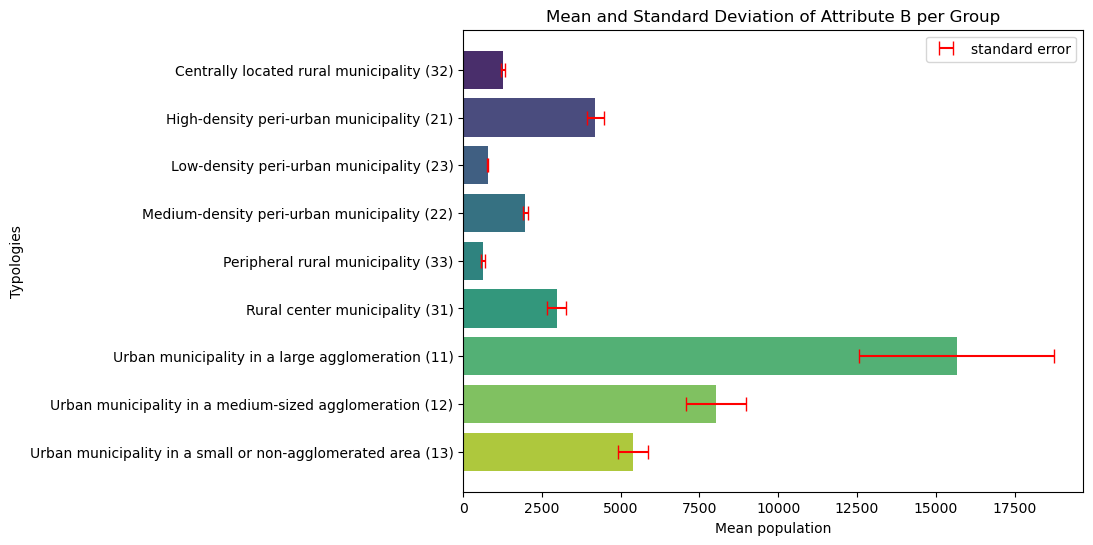

In [41]:

df = Covariates_final_df

# Group by 'Attribute A' and calculate mean and standard deviation of 'Attribute B'
grouped_df = df.groupby('urban_typo')['Population'].agg(['mean', 'std', 'count']).reset_index()
grouped_df["se"] = grouped_df["std"]/grouped_df["count"].apply("sqrt")
#print(grouped_df)

# Plot the mean and standard deviation using Seaborn or Matplotlib
plt.figure(figsize=(8, 6))

# Create the barplot with different colors per category
sns.barplot(y='urban_typo', x='mean', data=grouped_df, palette="viridis", hue='urban_typo', orient="h")

# Add error bars manually
plt.errorbar(y=grouped_df['urban_typo'], x=grouped_df['mean'], xerr=grouped_df['se'], fmt='none', capsize=5, color='red', label="standard error")

# Add labels and title
plt.title('Mean and Standard Deviation of Attribute B per Group')
plt.xlabel('Mean population')
plt.legend()
plt.ylabel('Typologies')

# Show the plot
plt.show()


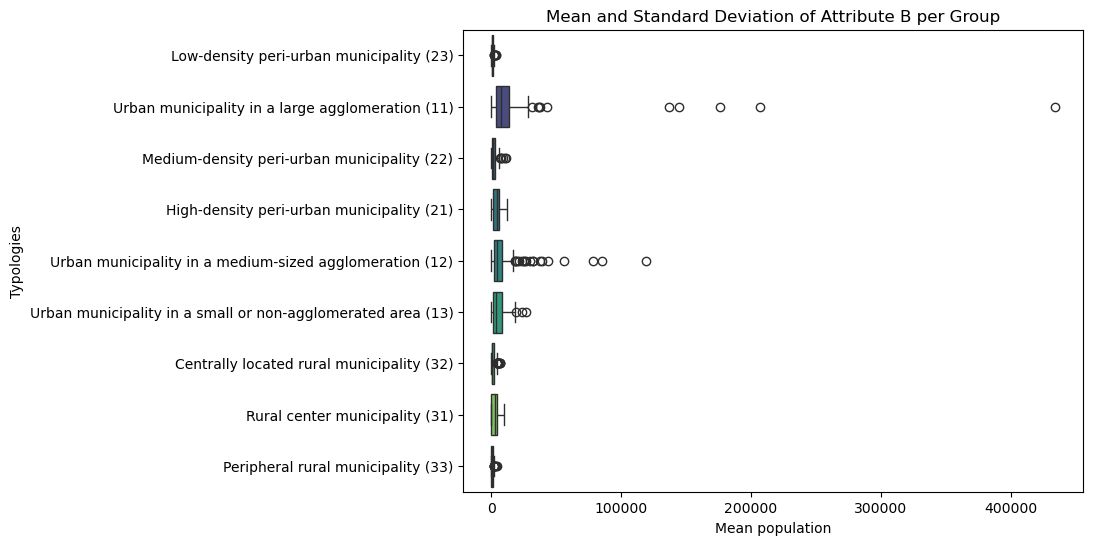

In [42]:

df = Covariates_final_df

# Group by 'Attribute A' and calculate mean and standard deviation of 'Attribute B'
grouped_df = df.groupby('urban_typo')['Population'].agg(['mean', 'std', 'count']).reset_index()
grouped_df["se"] = grouped_df["std"]/grouped_df["count"].apply("sqrt")
#print(grouped_df)

# Plot the mean and standard deviation using Seaborn or Matplotlib
plt.figure(figsize=(8, 6))

# Create the barplot with different colors per category
sns.boxplot(y='urban_typo', x='Population', data=Covariates_final_df, palette="viridis", hue='urban_typo')

# Add error bars manually
#plt.errorbar(y=grouped_df['urban_typo'], x=grouped_df['mean'], xerr=grouped_df['se'], fmt='none', capsize=5, color='red', label="standard error")

# Add labels and title
plt.title('Mean and Standard Deviation of Attribute B per Group')
plt.xlabel('Mean population')
plt.ylabel('Typologies')

# Show the plot
plt.show()


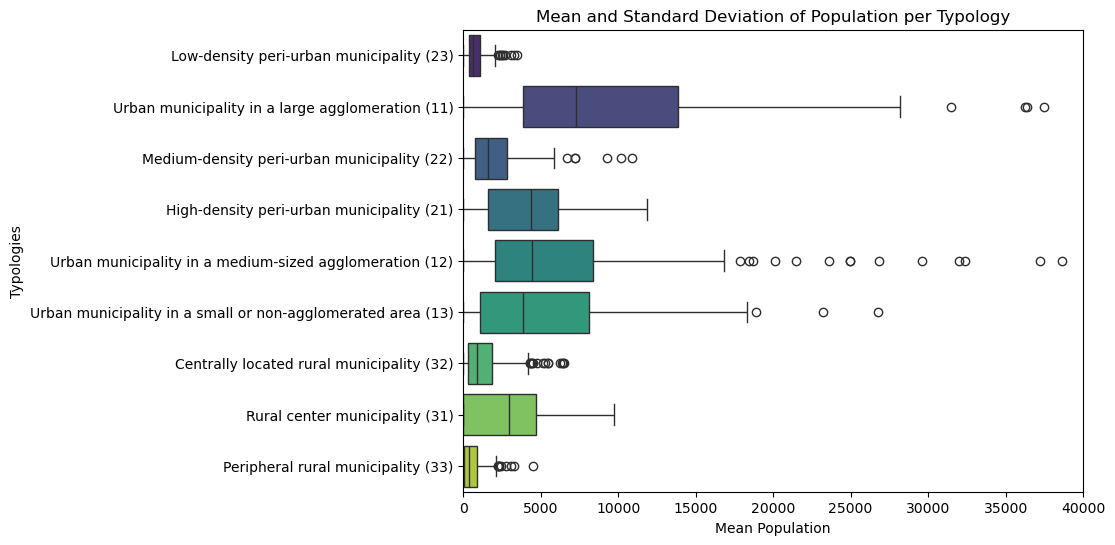

In [43]:
# Calculate Standard Error (SE)
grouped_df['se'] = grouped_df['std'] / grouped_df['count'] ** 0.5

# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='urban_typo', x='Population', data=Covariates_final_df, palette="viridis", hue='urban_typo')

# Add labels and title
plt.title('Mean and Standard Deviation of Population per Typology')
plt.xlabel('Mean Population')
plt.ylabel('Typologies')
plt.xlim([0, 40000])

# Show the plot
plt.show()

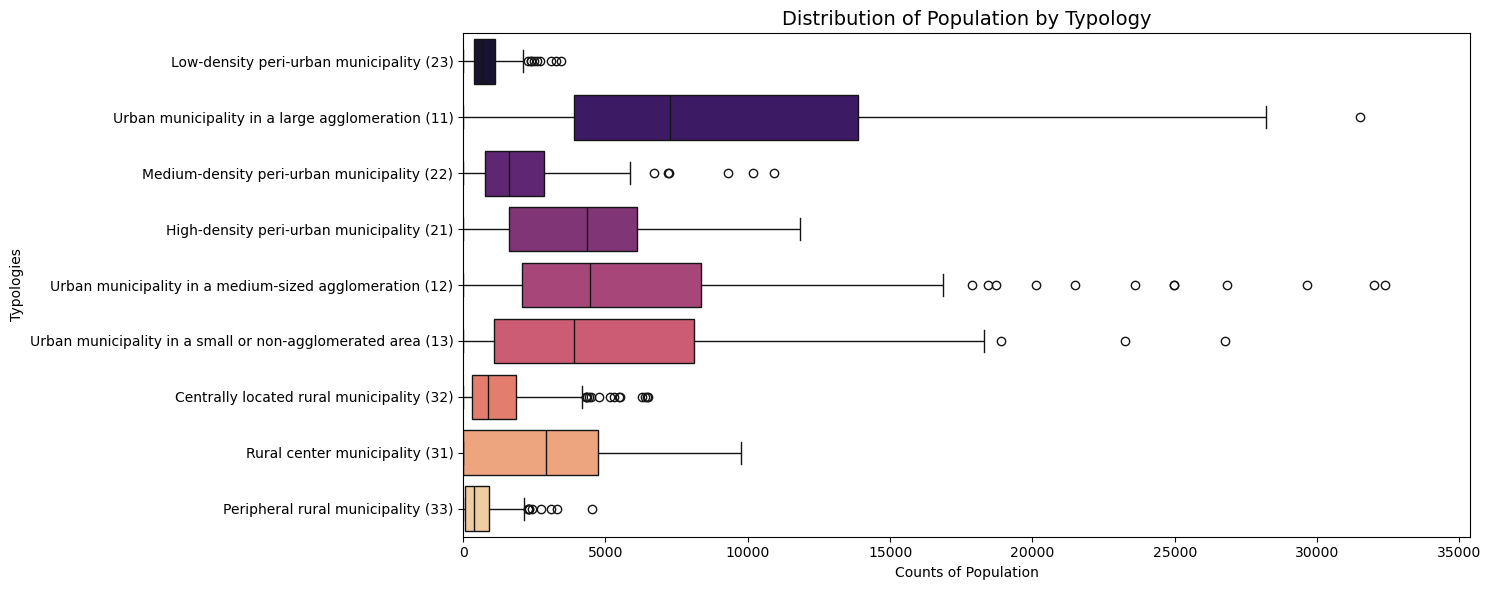

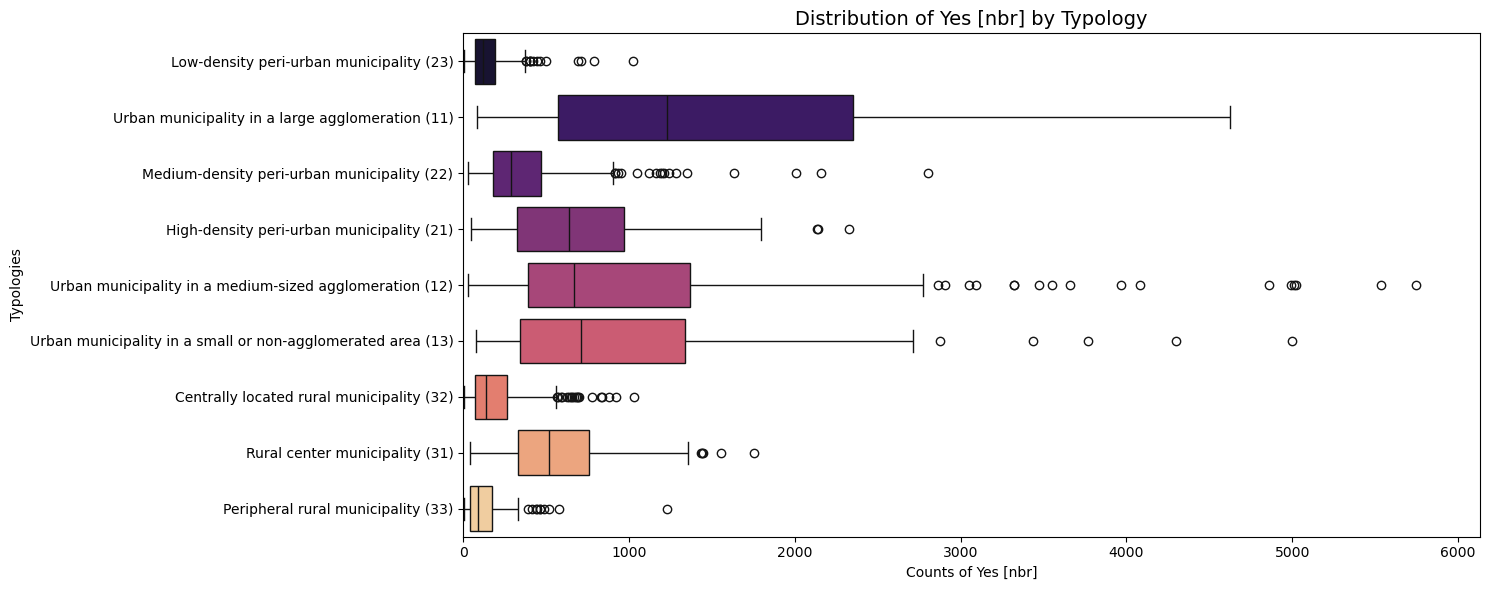

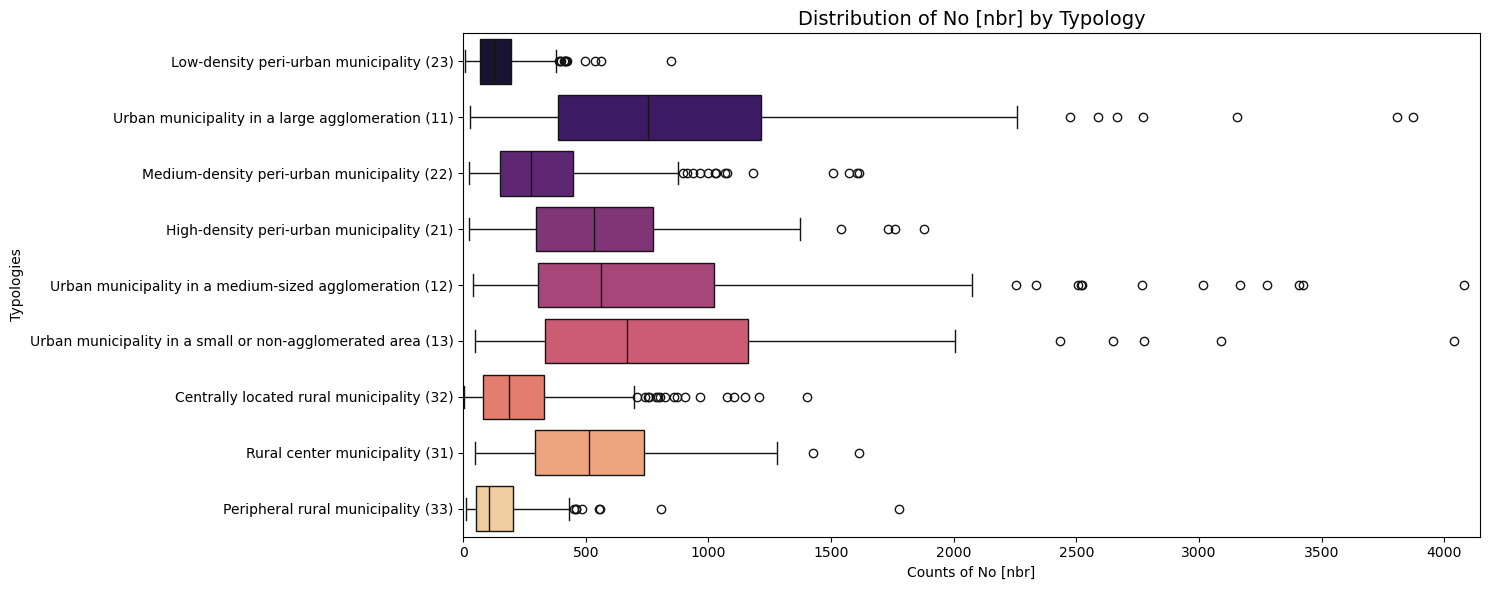

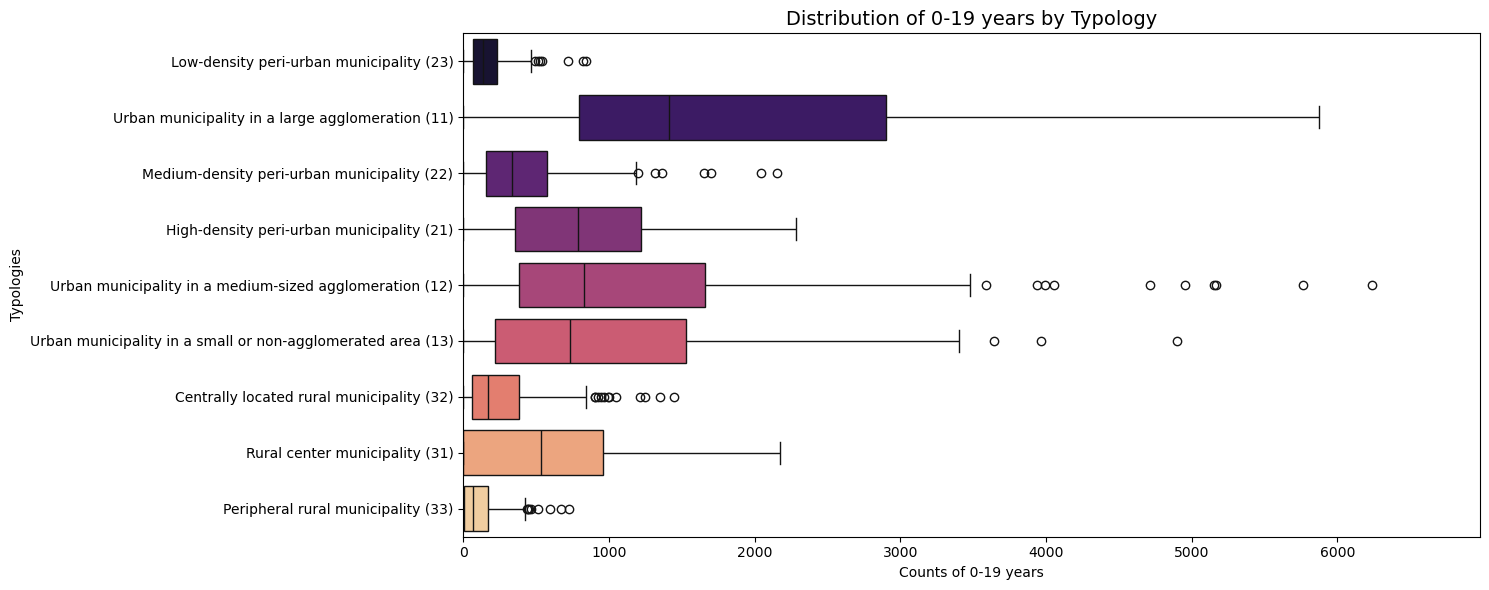

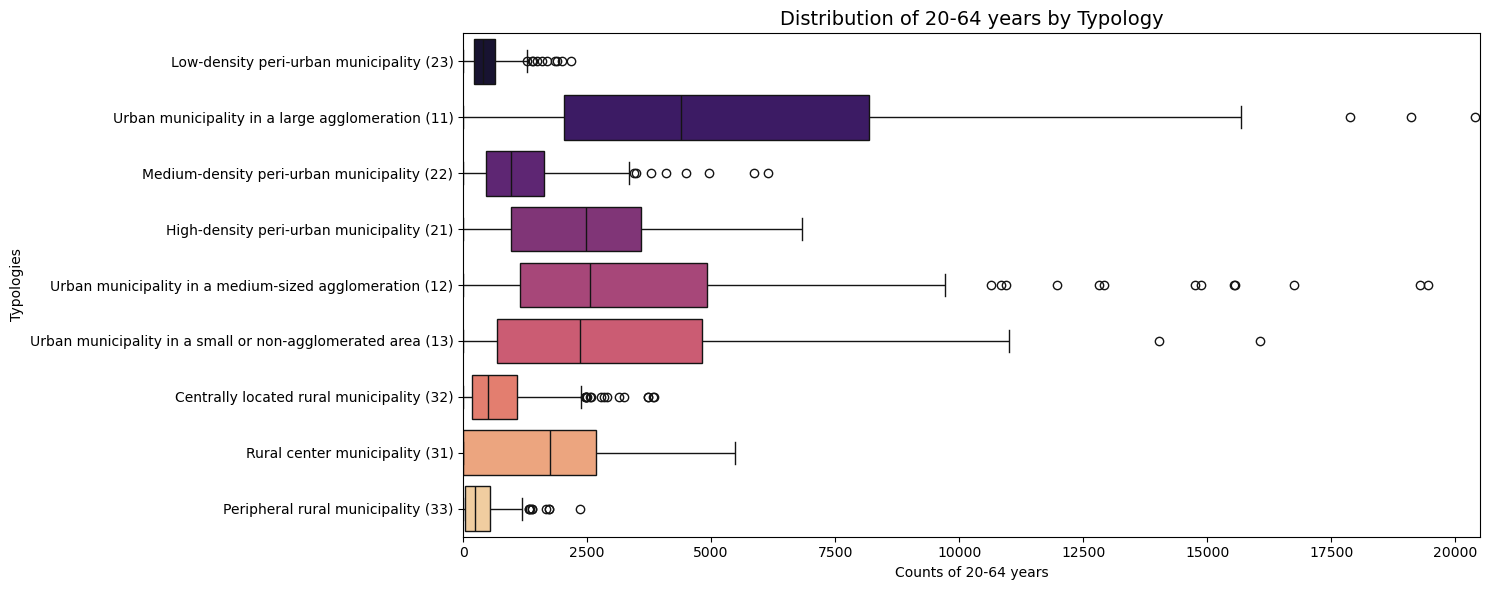

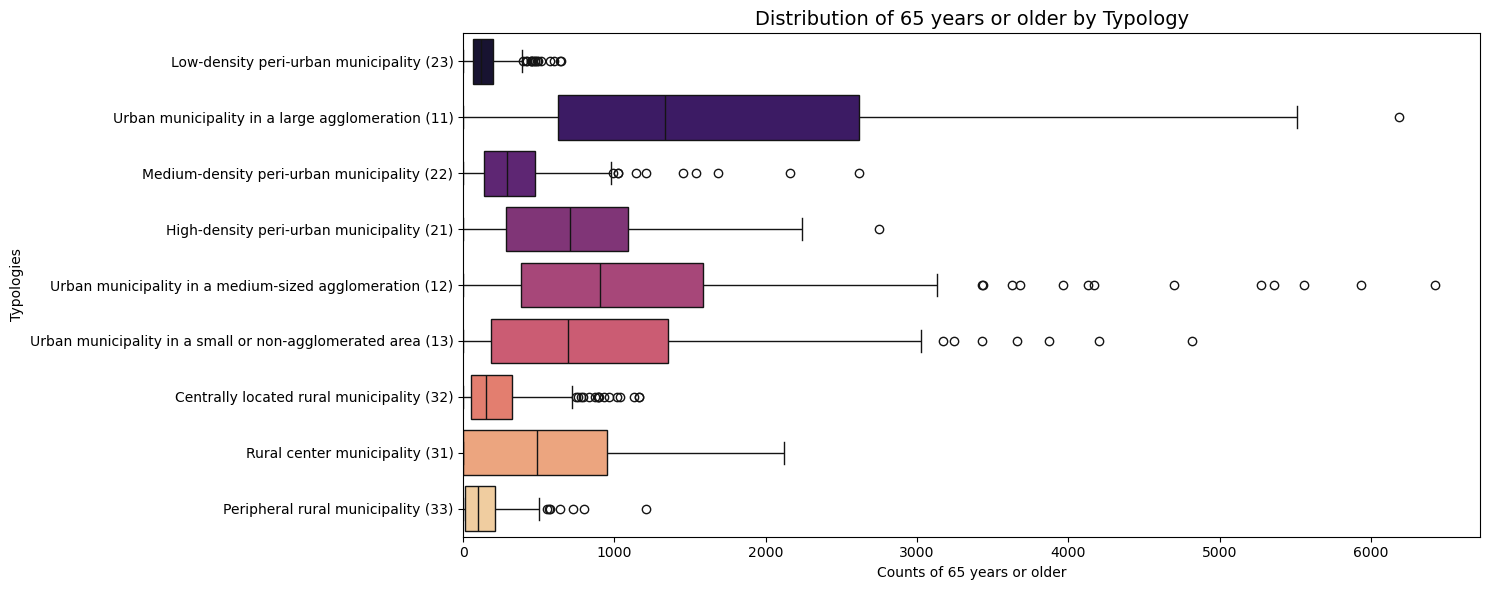

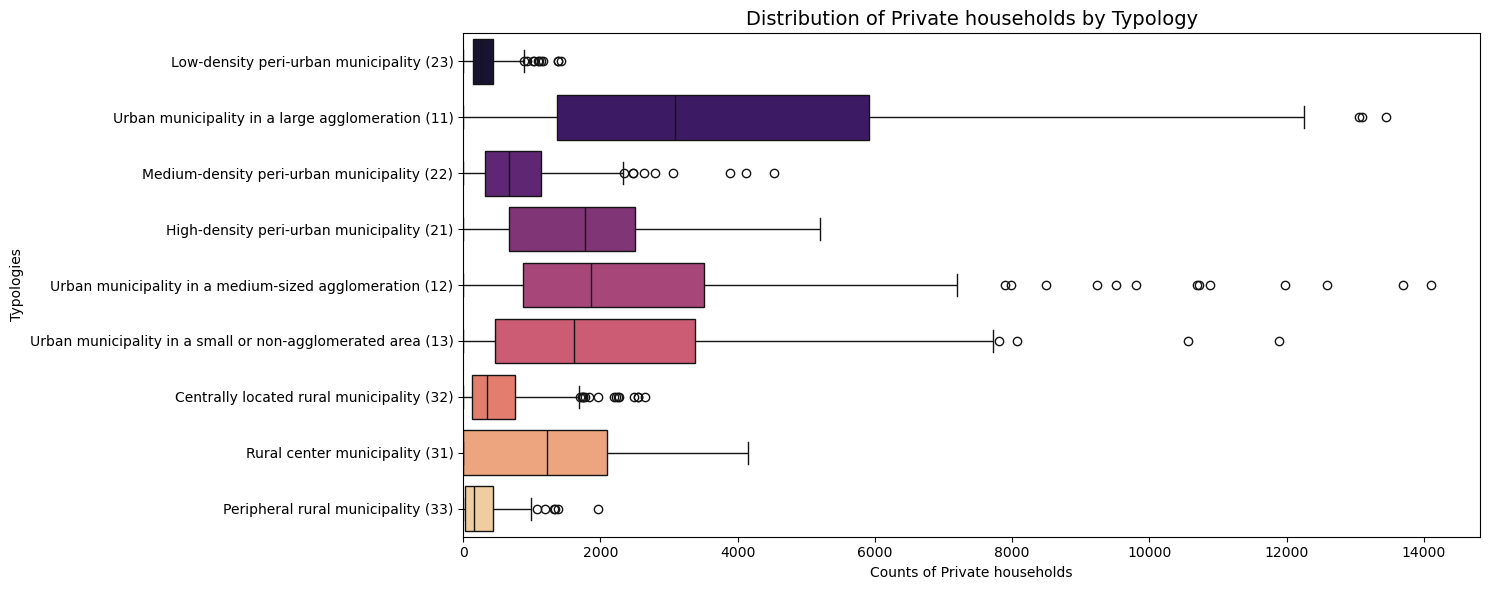

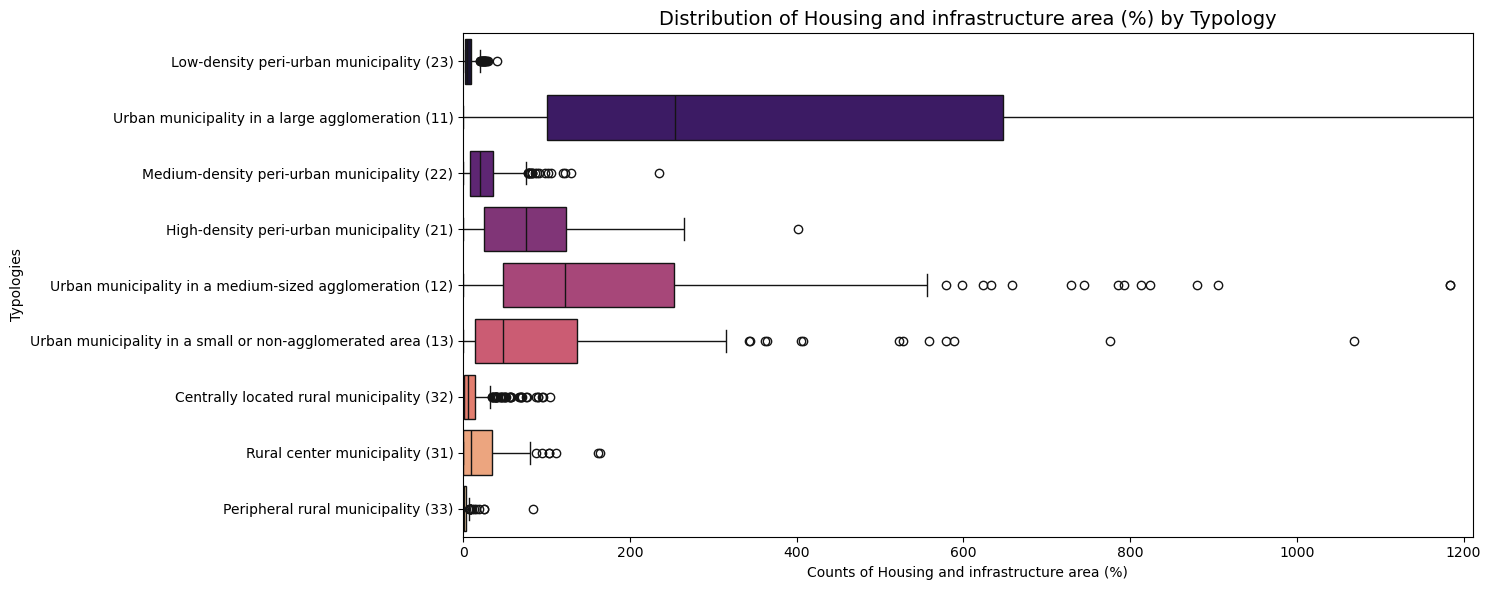

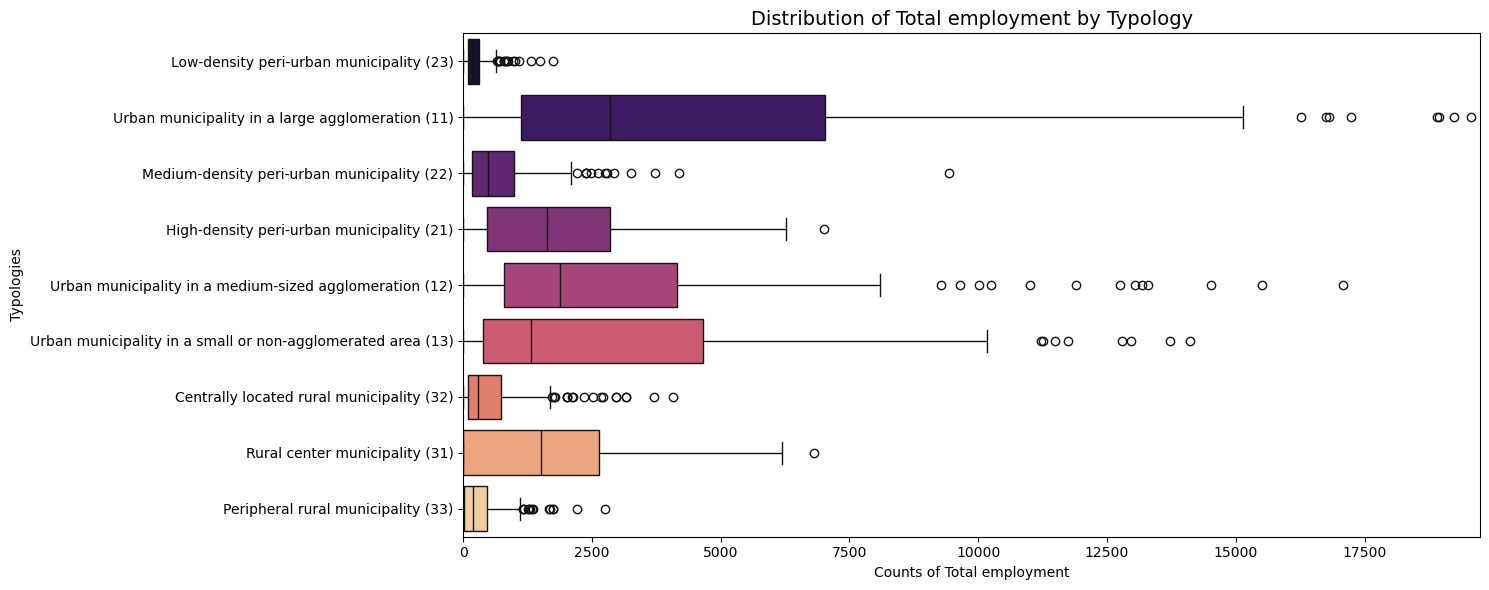

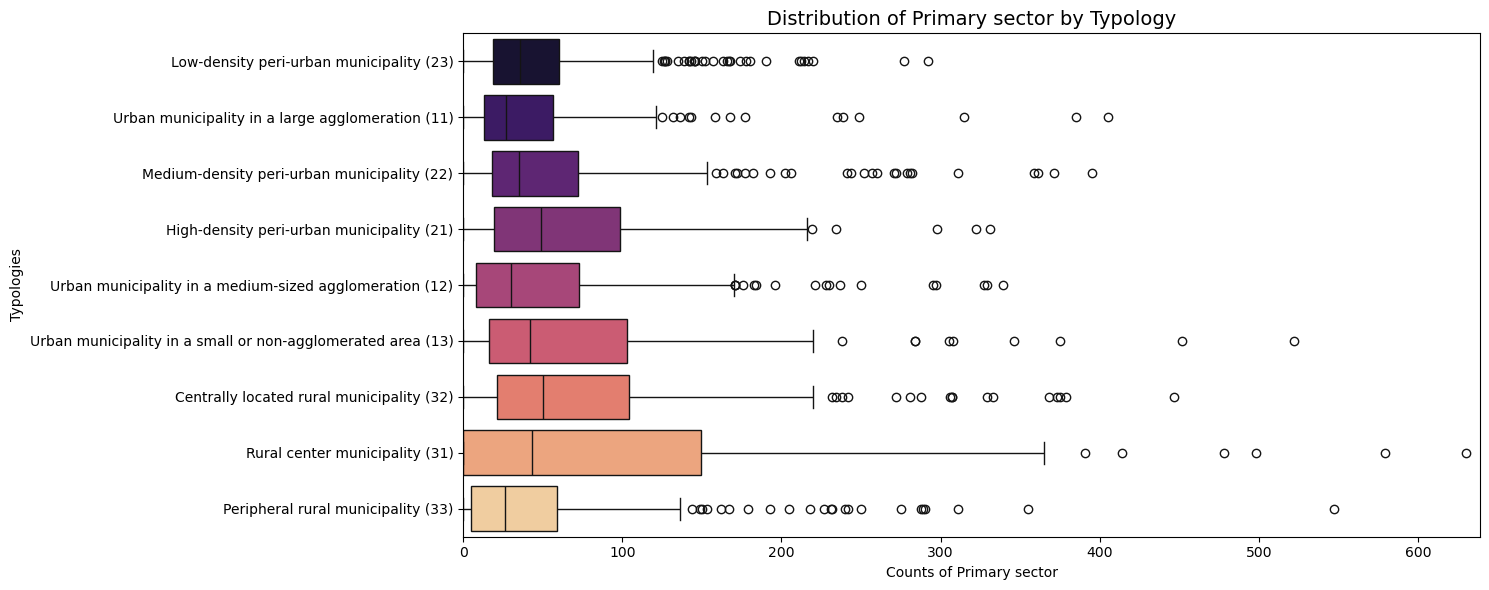

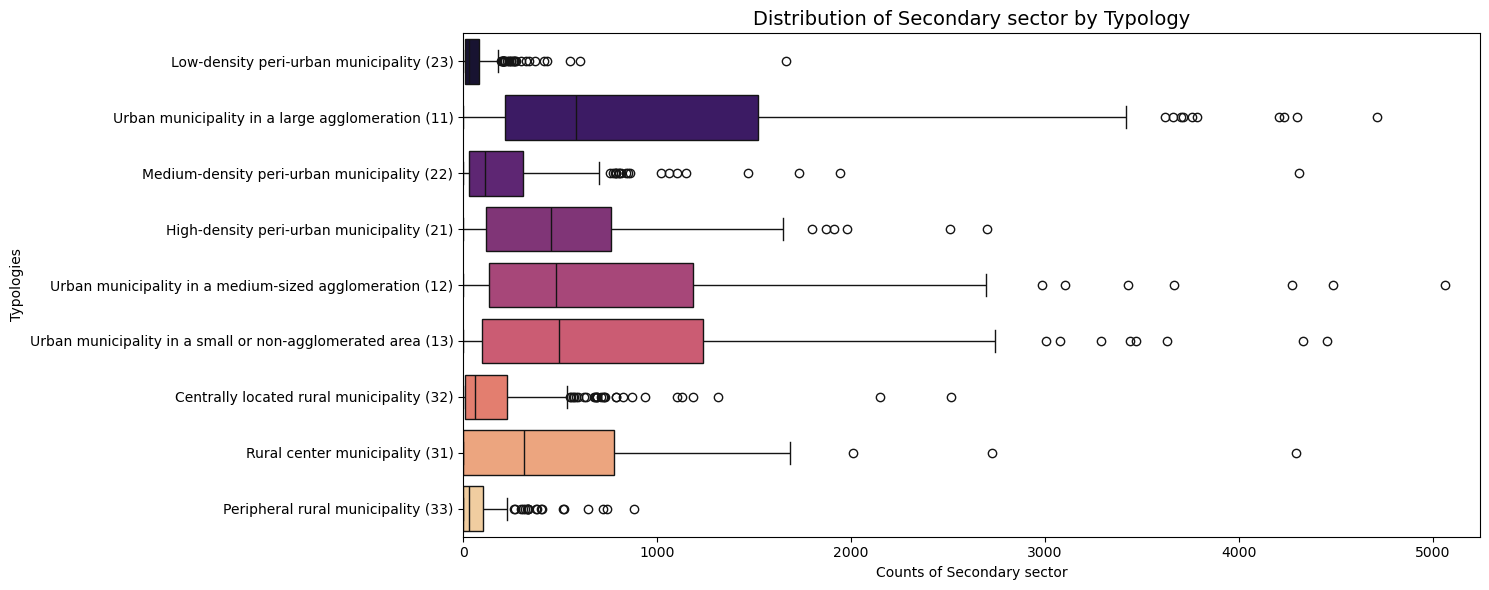

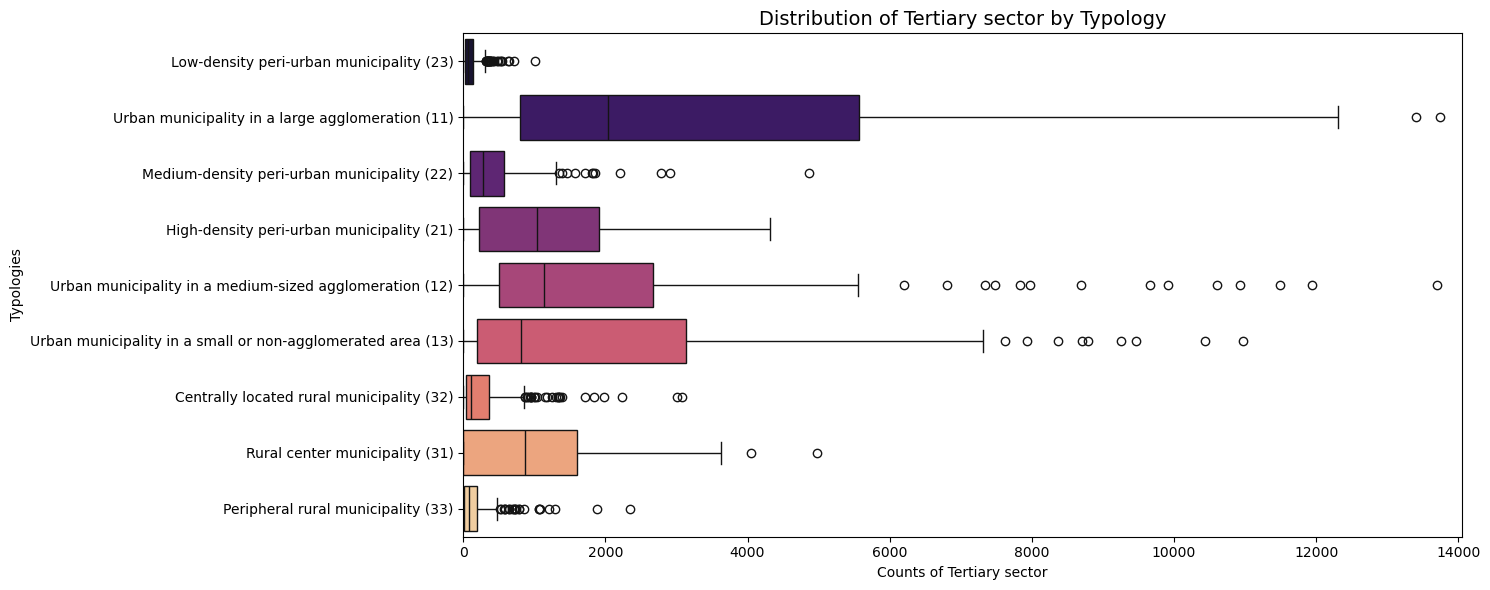

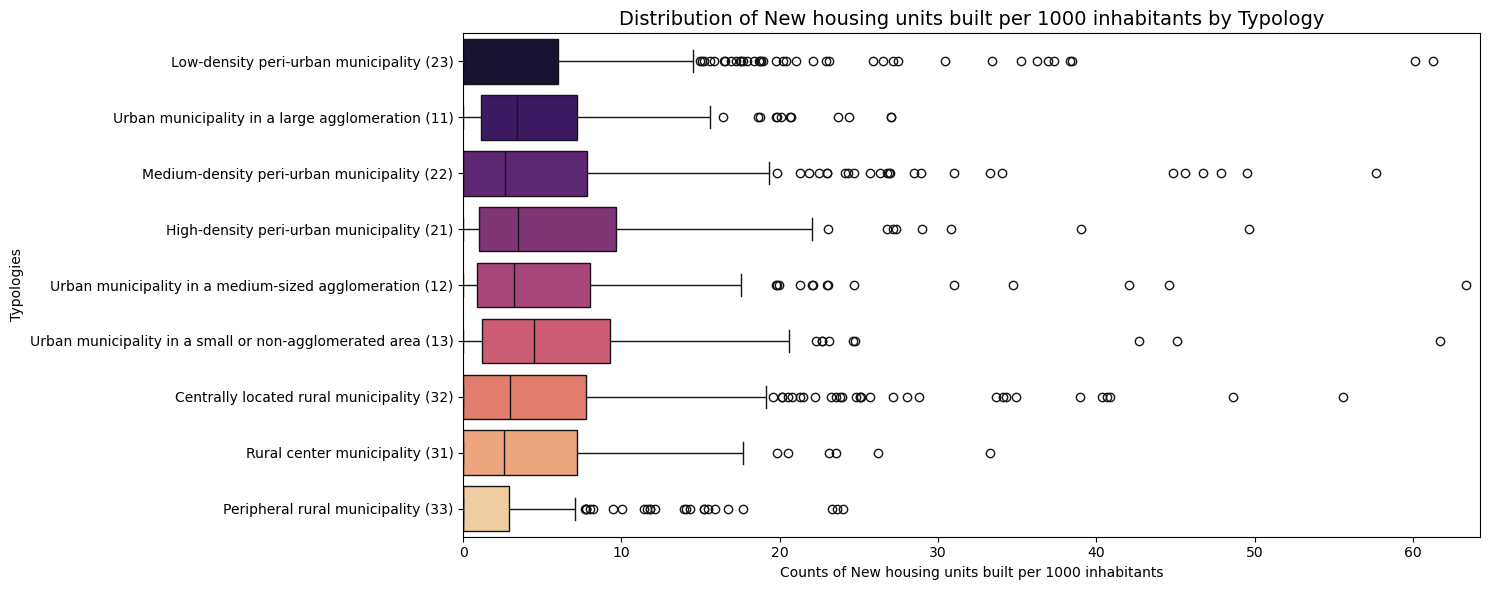

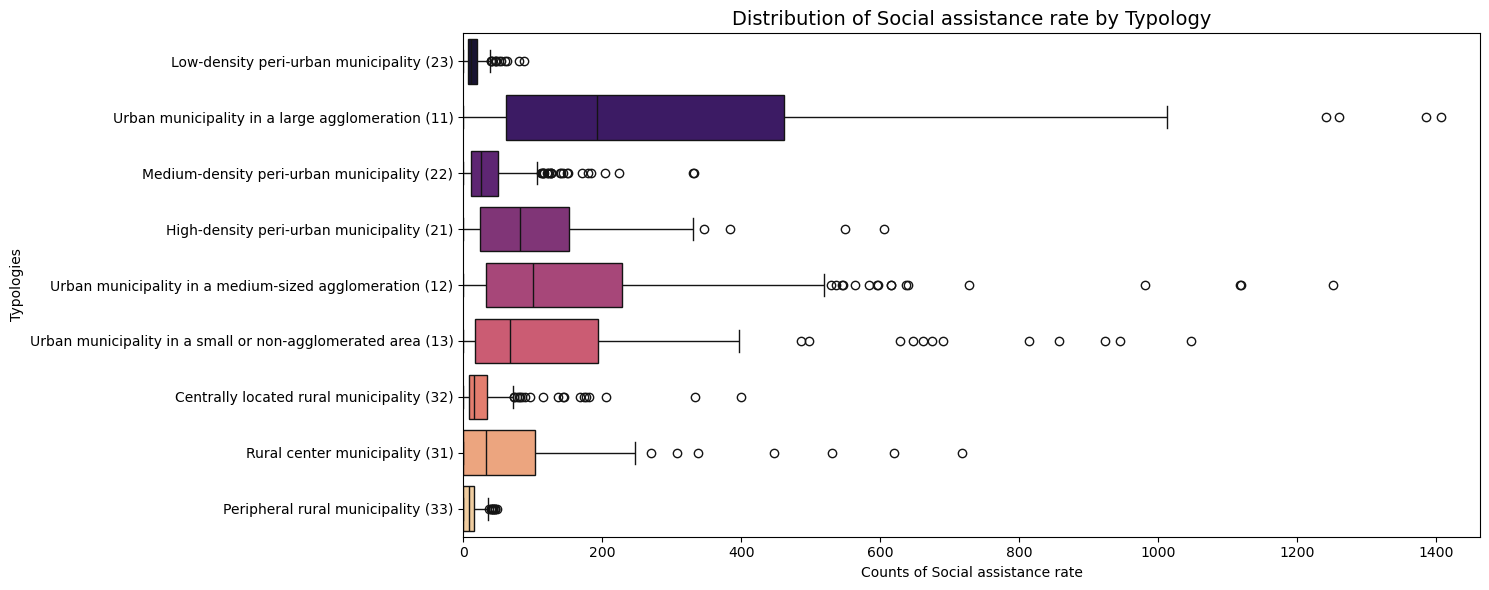

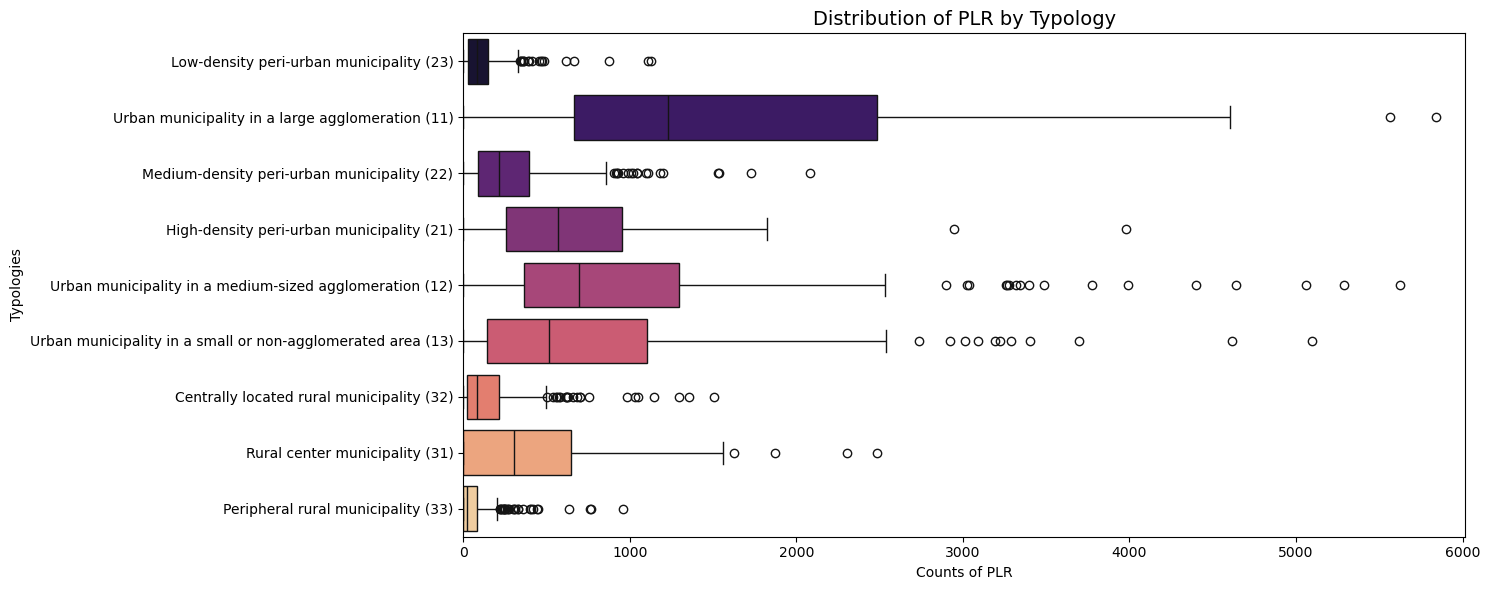

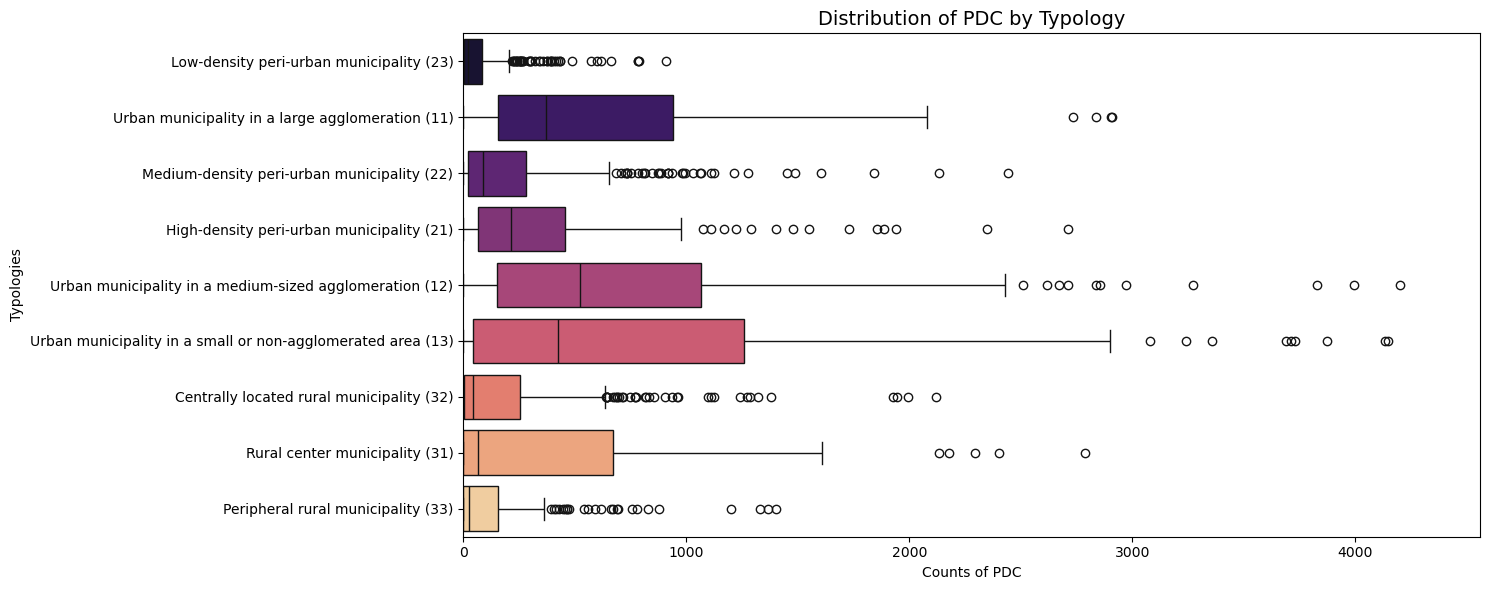

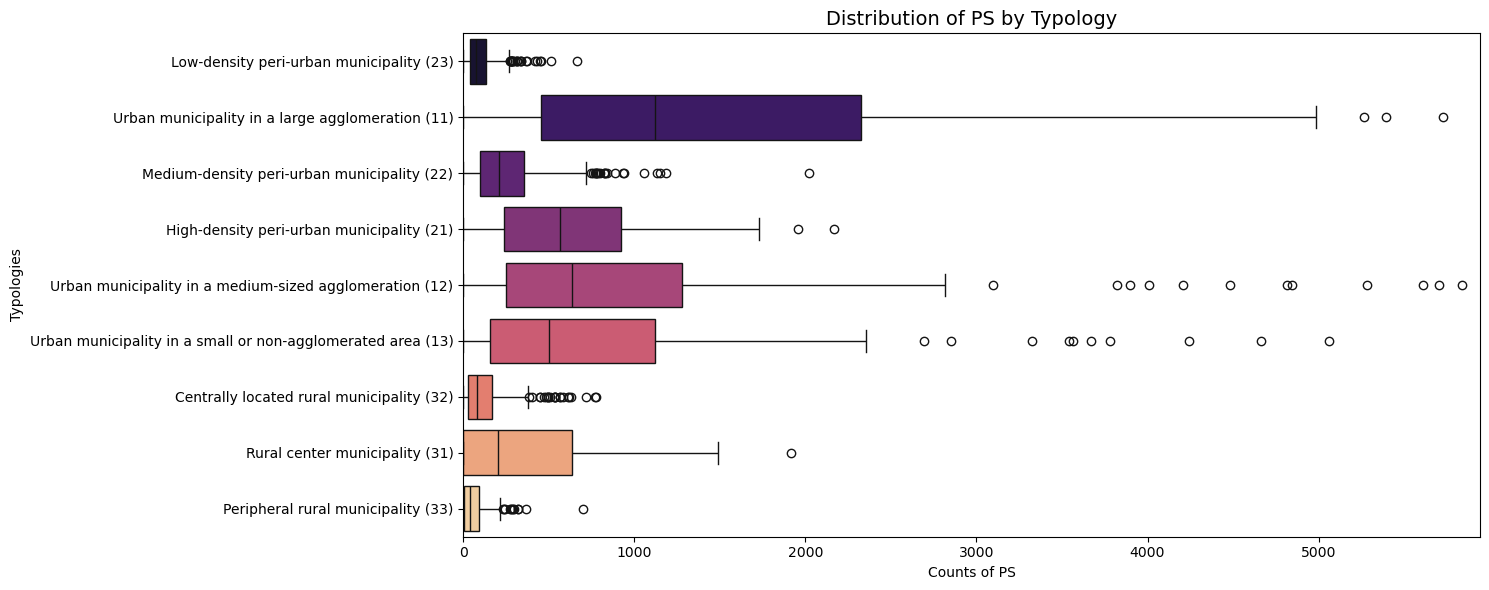

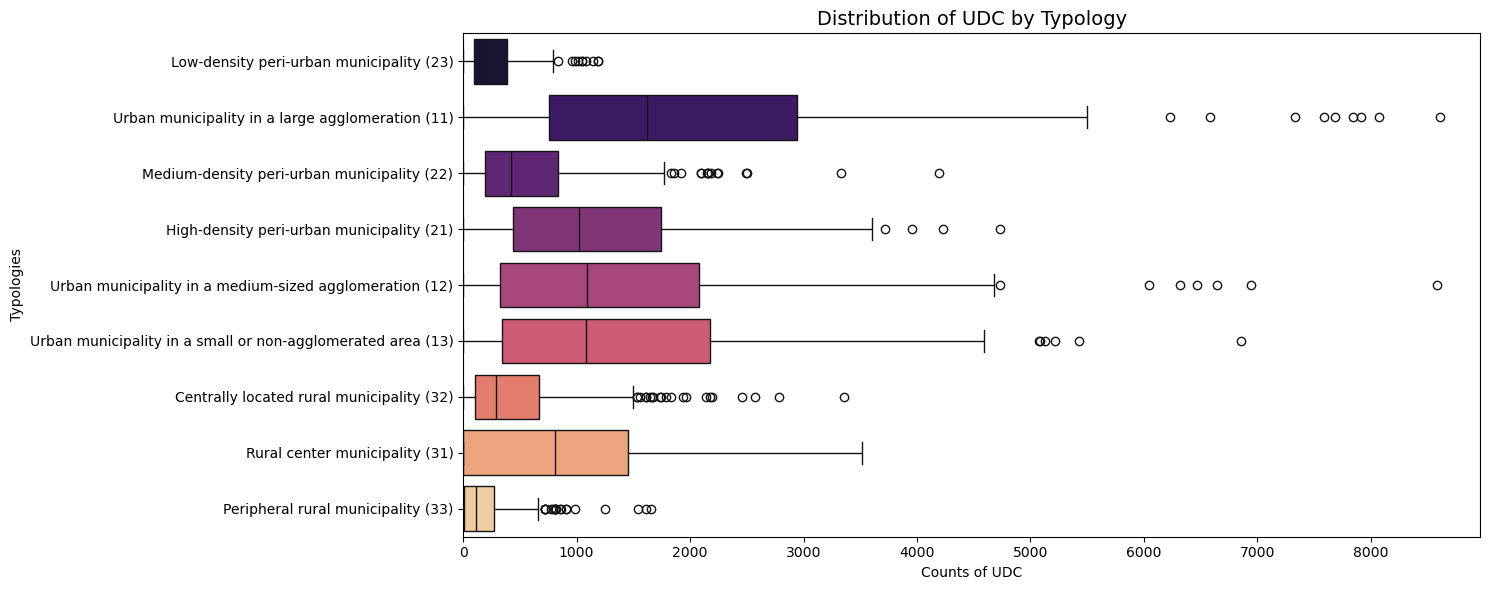

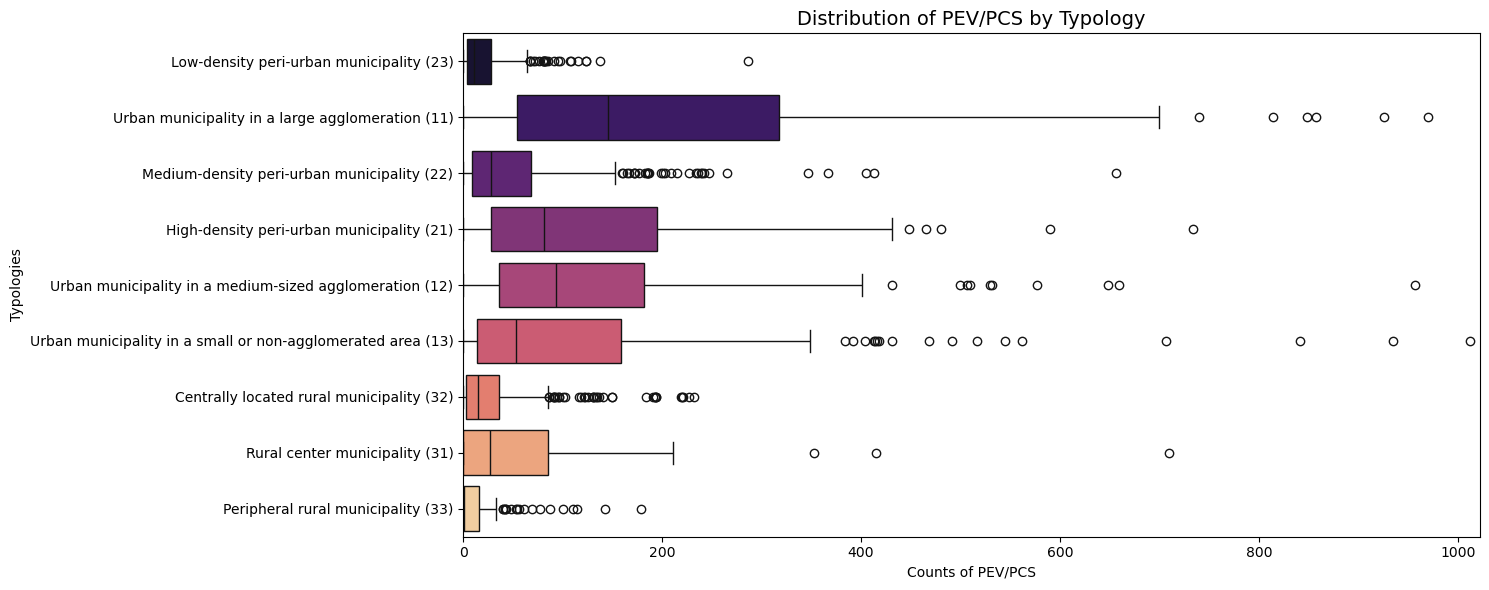

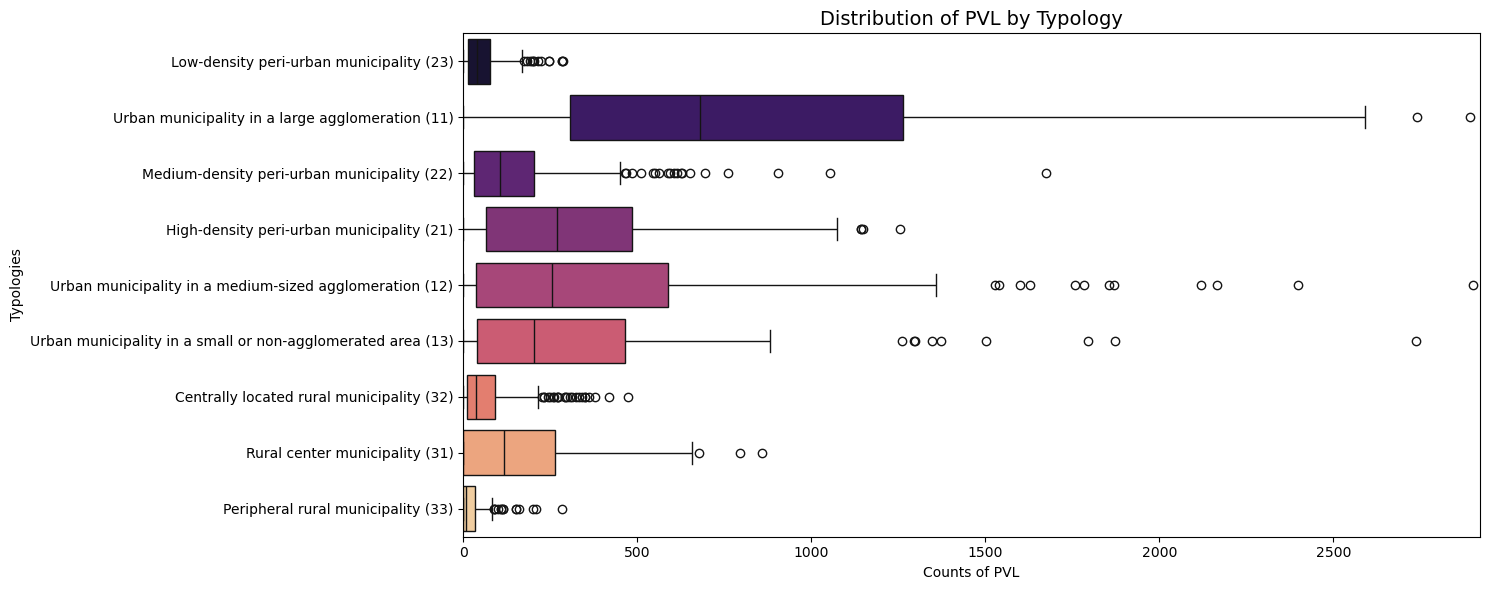

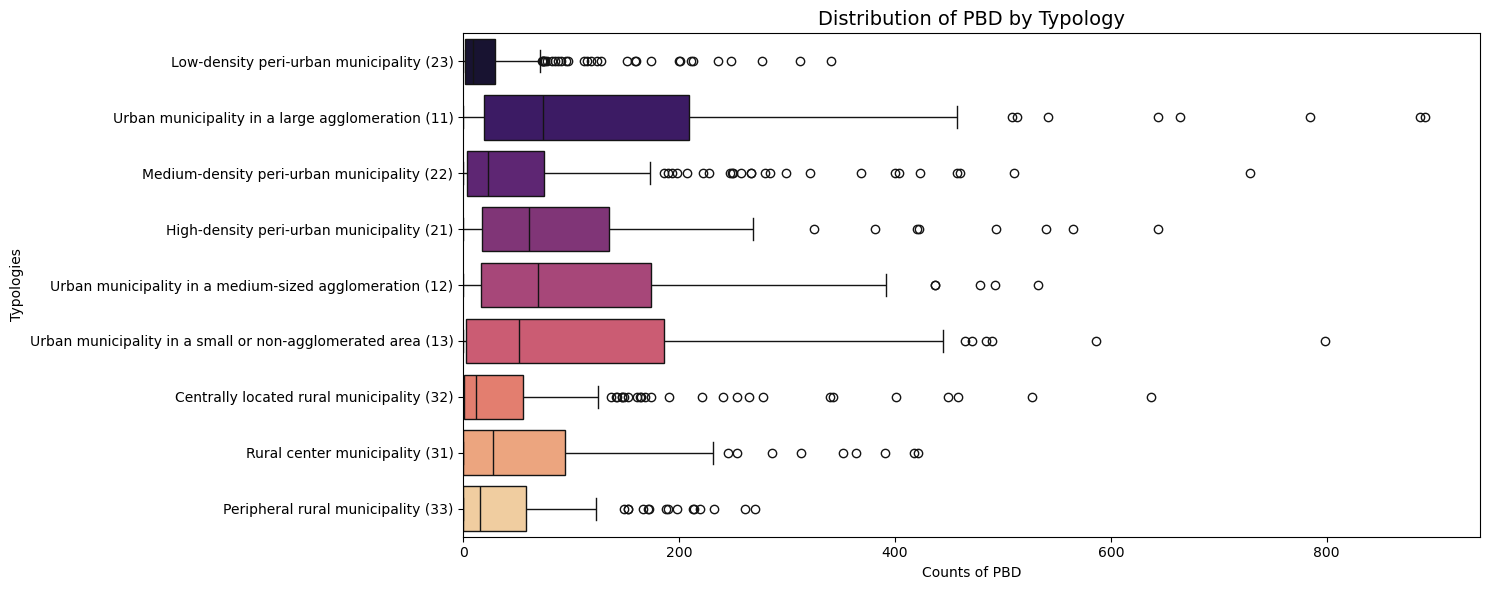

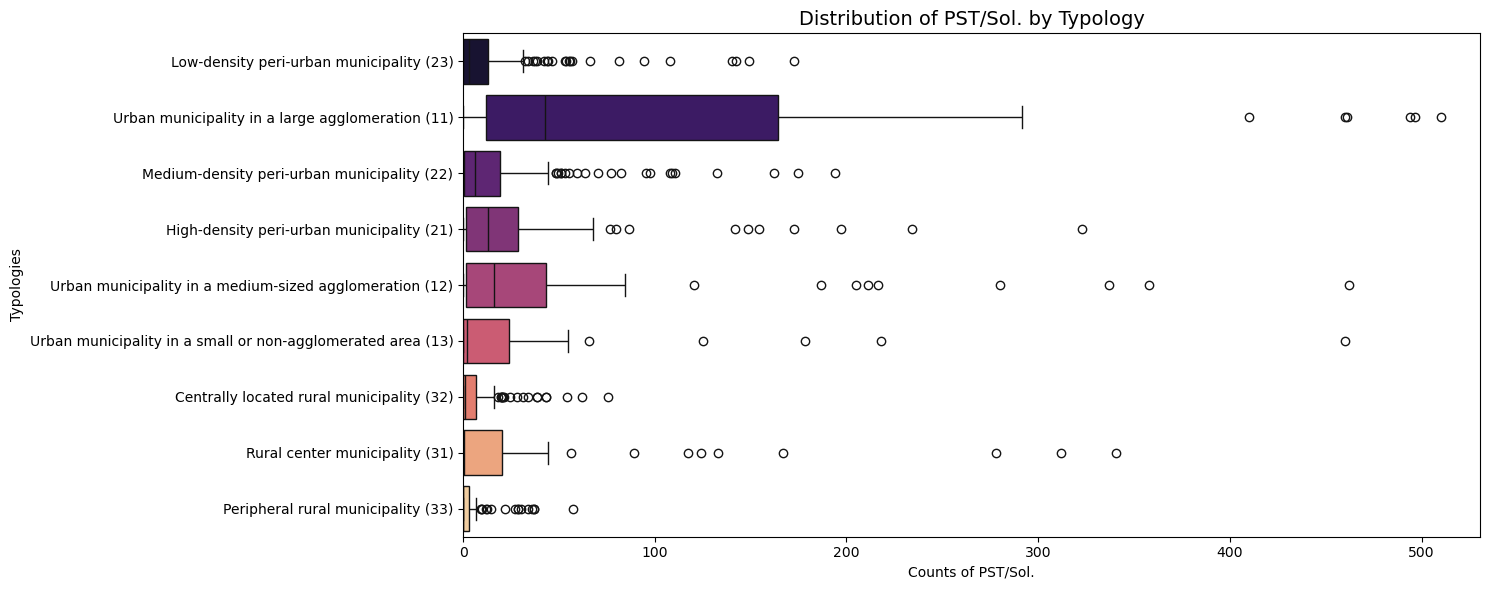

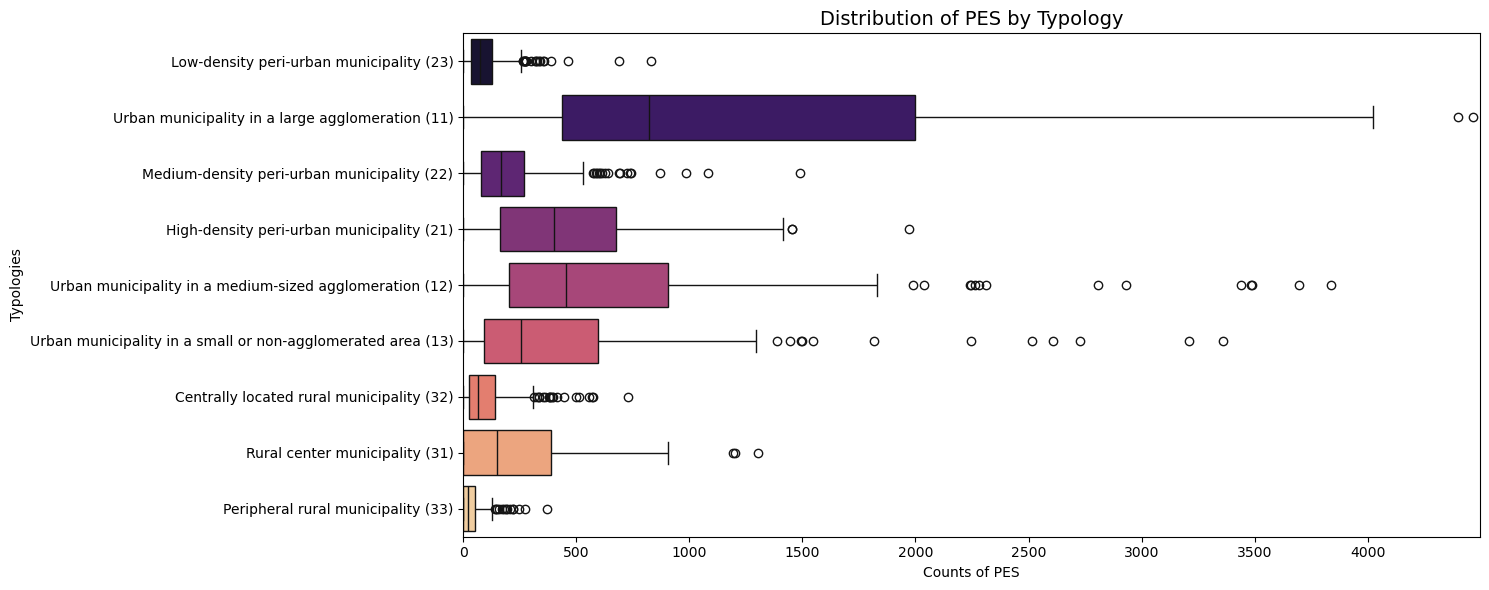

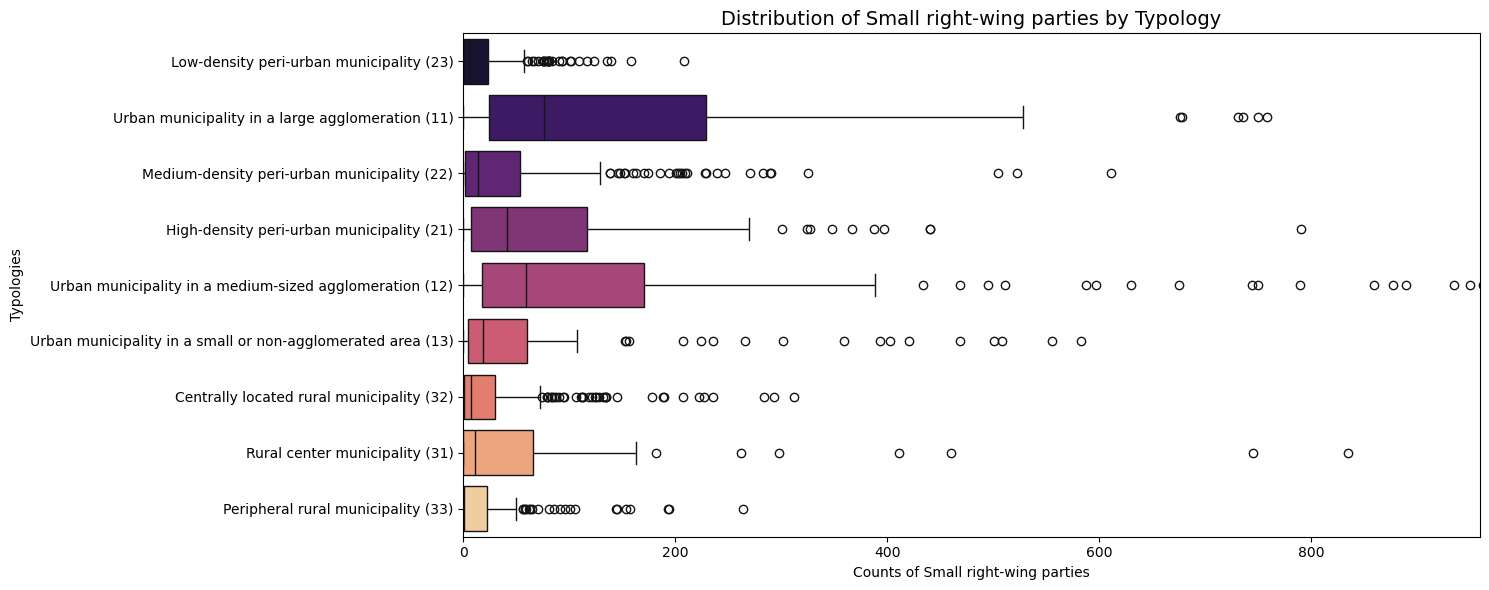

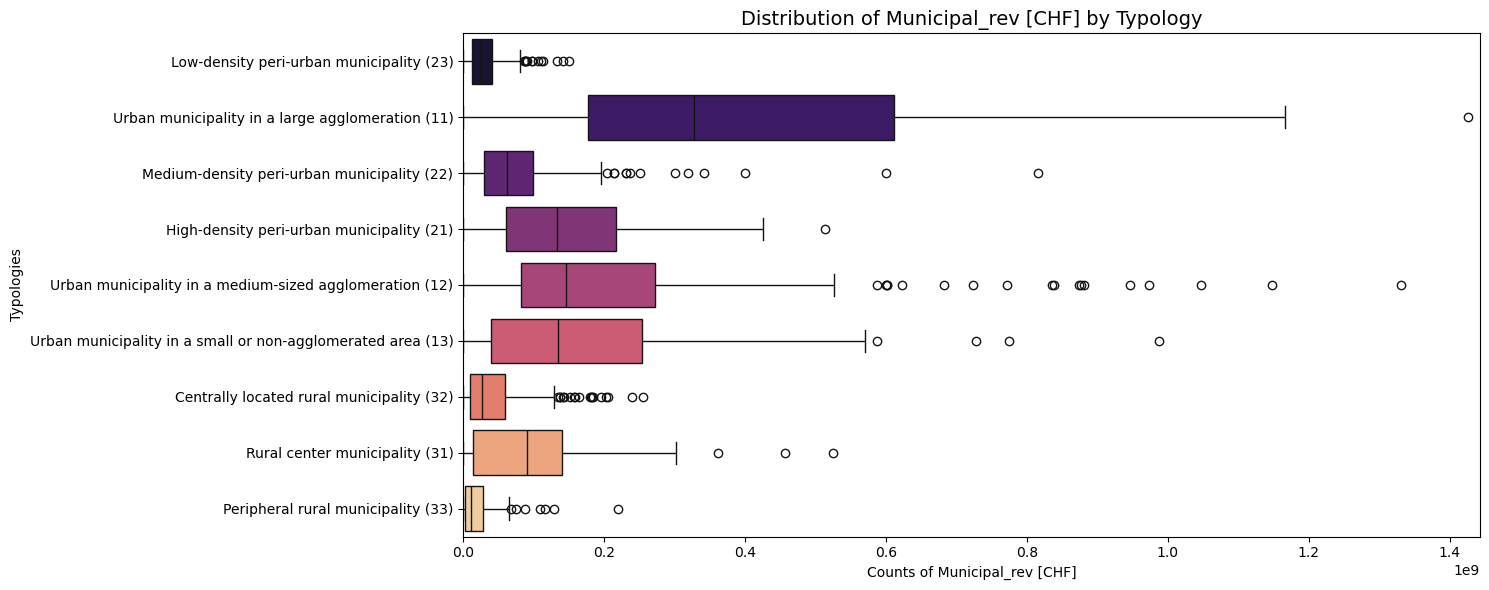

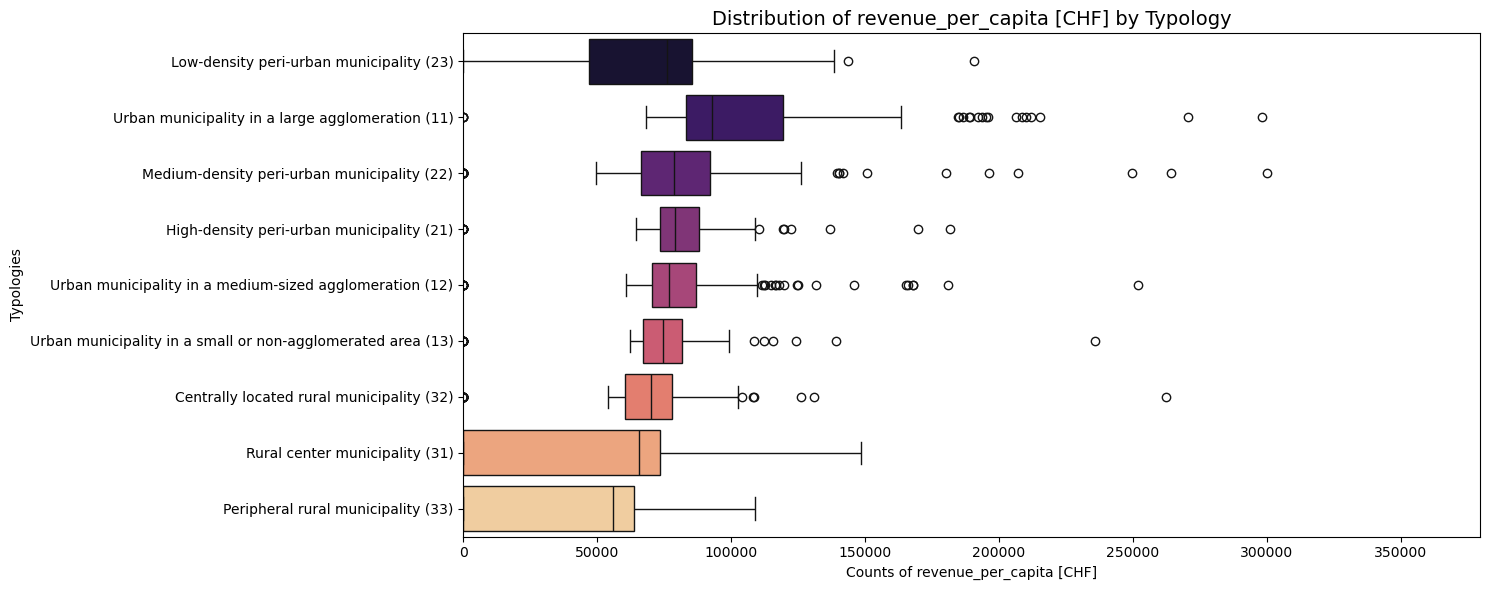

In [44]:
numeric_columns = list(Covariates_final_df.select_dtypes(include='number').columns)
len(numeric_columns)

# Assuming `numeric_columns` is a list of column names you want to plot
for j, col in enumerate(numeric_columns):
    # Create a new figure for each variable
    plt.figure(figsize=(15, 6))
    
    # Plot a boxplot for each variable
    sns.boxplot(y='urban_typo', x=col, data=Covariates_final_df, palette="magma", hue='urban_typo')
    
    # Set titles and labels
    plt.title(f'Distribution of {col} by Typology', fontsize=14)
    plt.xlabel(f'Counts of {col}')
    plt.ylabel('Typologies')
    plt.xlim([0, 3*Covariates_final_df[col].quantile(0.95)])
    
    # Display the plot
    plt.tight_layout()
    plt.show()


# Deep embedded clustering 

Data type: <class 'sklearn.utils._bunch.Bunch'>
Epoch 0/100, Loss: 1.129952745357312e+16
Epoch 10/100, Loss: 1.129952745357312e+16
Epoch 20/100, Loss: 1.129952745357312e+16
Epoch 30/100, Loss: 1.129952745357312e+16
Epoch 40/100, Loss: 1.129952745357312e+16
Epoch 50/100, Loss: 1.129952745357312e+16
Epoch 60/100, Loss: 1.129952745357312e+16
Epoch 70/100, Loss: 1.129952745357312e+16
Epoch 80/100, Loss: 1.129952745357312e+16
Epoch 90/100, Loss: 1.129952745357312e+16


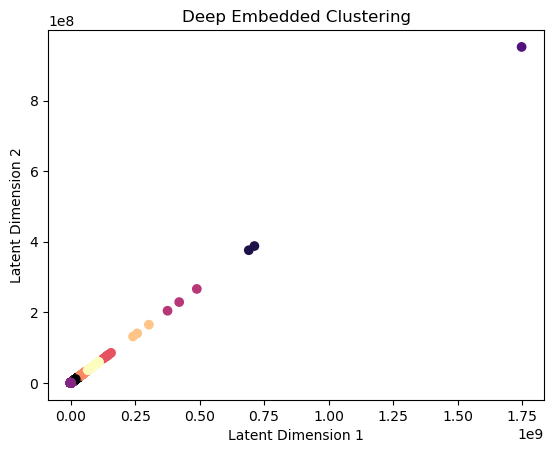

array([0, 6, 0, ..., 3, 3, 3])

In [138]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.utils import Bunch

# Define an Autoencoder architecture in PyTorch
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

# Assuming `Covariates_final_df` is your DataFrame and `numeric_columns` is a list of numeric columns
# Example: numeric_columns = ['column1', 'column2', ...]
# Extract the numeric data from the DataFrame
df = Covariates_final_df[numeric_columns].copy()
df =df.replace(np.nan, 0)
X = df.to_numpy()  # Convert to numpy array

# Create a Bunch object with the DataFrame data and the index as the target
data = Bunch(data=X, target=Covariates_final_df.index)
print(f"Data type: {type(data)}")

# Convert the data to PyTorch tensor
X_tensor = torch.tensor(X, dtype=torch.float32)

# Initialize the model, loss function, and optimizer
input_dim = X.shape[1]  # Number of features (e.g., 4 for Iris dataset)
encoding_dim = 2  # Number of dimensions in the embedded space (latent space)
model = Autoencoder(input_dim, encoding_dim)
criterion = nn.MSELoss()  # Mean Squared Error for reconstruction loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the Autoencoder
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    decoded, encoded = model(X_tensor)
    loss = criterion(decoded, X_tensor)
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}/{epochs}, Loss: {loss.item()}')

# Extract the learned embeddings (latent space)
with torch.no_grad():
    model.eval()
    _, encoded_features = model(X_tensor)

# Apply KMeans clustering to the embeddings
encoded_features = encoded_features.numpy()  # Convert to numpy for KMeans
kmeans = KMeans(n_clusters=9)
kmeans.fit(encoded_features)
labels = kmeans.labels_

# Plot the clustered data in the 2D embedded space
plt.scatter(encoded_features[:, 0], encoded_features[:, 1], c=labels, cmap='magma')
plt.title('Deep Embedded Clustering')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()
labels

In [140]:
Covariates_final_df["label"] = labels
Covariates_final_df.head()

MunicipalityName  \
MunicipalityNumber                       
1.0                    Aeugst am Albis   
2.0                 Affoltern am Albis   
3.0                         Bonstetten   
4.0                    Hausen am Albis   
5.0                           Hedingen   

                                                          urban_typo  \
MunicipalityNumber                                                     
1.0                         Low-density peri-urban municipality (23)   
2.0                 Urban municipality in a large agglomeration (11)   
3.0                      Medium-density peri-urban municipality (22)   
4.0                      Medium-density peri-urban municipality (22)   
5.0                 Urban municipality in a large agglomeration (11)   

                                      mountain_type  \
MunicipalityNumber                                    
1.0                 Moyen-pays - Rhin supérieur (1)   
2.0                 Moyen-pays - Rhin supérieur (1)   
3.0                 Moyen-pays - Rhin supérieur (1)   
4.0                 Moyen-pays - Rhin supérieur (1)   
5.0                 Moyen-pays - Rhin supérieur (1)   

                                          mountain_binary  Population  \
MunicipalityNumber                                                      
1.0                 Communes hors des régions de montagne      1998.0   
2.0                 Communes hors des régions de montagne     12859.0   
3.0                 Communes hors des régions de montagne      5678.0   
4.0                 Communes hors des régions de montagne      3974.0   
5.0                 Communes hors des régions de montagne      3963.0   

                   language  Canton  Yes [nbr]  No [nbr]  0-19 years  ...  \
MunicipalityNumber                                                    ...   
1.0                  german  Zürich      444.0     335.0       392.0  ...   
2.0                  german  Zürich     1884.0    1260.0      2481.0  ...   
3.0                  german  Zürich     1197.0     706.0      1317.0  ...   
4.0                  german  Zürich      764.0     555.0       832.0  ...   
5.0                  german  Zürich      809.0     580.0       817.0  ...   

                            UDC     PEV/PCS          PVL         PBD  \
MunicipalityNumber                                                     
1.0                  601.846806   63.936187   283.625599   25.034375   
2.0                 3728.660363  814.280934  1558.375321  246.237806   
3.0                 1455.200958  233.690707   904.777747   71.546175   
4.0                 1244.761083  152.281637   465.760510   60.419112   
5.0                 1005.015667  140.800445   620.171683   71.073719   

                     PST/Sol.          PES  Small right-wing parties  \
MunicipalityNumber                                                     
1.0                  3.211407   298.149915                 75.687016   
2.0                 24.448314  1549.017114                191.375321   
3.0                  9.807453   689.174556                 77.173402   
4.0                  7.243925   628.072197                 60.419112   
5.0                  6.893438   466.535182                 82.008137   

                    Municipal_rev [CHF]  revenue_per_capita [CHF]  label  
MunicipalityNumber                                                        
1.0                         109921000.0                       NaN      0  
2.0                         435719400.0              80080.757214      6  
3.0                         251102000.0              99960.987261      0  
4.0                         165486900.0             100968.212325      0  
5.0                         177331200.0             106826.024096      0  

[5 rows x 33 columns]

In [142]:
group = Covariates_final_df.groupby("label")[numeric_columns].mean()
group

Population     Yes [nbr]      No [nbr]    0-19 years    20-64 years  \
label                                                                           
0        5058.362319    704.601449    598.304348   1006.758454    2939.275362   
1      191482.000000  29756.000000   9616.500000  32883.500000  123082.000000   
2      433989.000000  86847.000000  25386.000000  73514.000000  284691.000000   
3         991.712427    262.876712    244.322244    200.443722     578.874431   
4      133487.666667  27808.000000   7798.666667  24039.666667   84343.000000   
5       33746.428571   6022.142857   3357.857143   6325.000000   20227.285714   
6       11294.173913   1752.086957   1205.104348   2202.252174    6604.252174   
7       65247.333333  12213.666667   5048.333333  10964.000000   40341.666667   
8       20960.255319   3161.744681   1707.489362   4012.234043   12342.276596   

       65 years or older  Private households  \
label                                          
0             914.772947         2095.456522   
1           32626.000000        88992.000000   
2           62012.000000       204411.000000   
3             181.051399          406.969421   
4           20674.666667        61979.666667   
5            6586.571429        15175.857143   
6            2109.034783         4771.791304   
7           11682.666667        30930.000000   
8            3748.723404         8917.085106   

       Housing and infrastructure area (%)  Total employment  Primary sector  \
label                                                                          
0                               113.281322       2231.493857       90.098280   
1                             16889.502483     186026.000000       32.500000   
2                             26041.886202     491193.000000      177.000000   
3                                11.760531        385.071184       48.566908   
4                              5364.199973     128554.666667      206.666667   
5                              1154.043171      22398.714286      159.857143   
6                               391.660161       6433.729730      101.225225   
7                              2617.223340      68948.666667      166.666667   
8                               933.844910      13484.021277       67.765957   

       ...             PS           UDC      PEV/PCS           PVL  \
label  ...                                                           
0      ...     749.083117   1420.457820   130.233341    370.870421   
1      ...   47697.956853  22639.495869  1959.580187   9929.547861   
2      ...  107698.694260  57449.976010  7079.531319  65805.618895   
3      ...     123.761808    323.236739    25.692414     58.688374   
4      ...   33804.703004  15286.639061  3340.042872  14655.279245   
5      ...    6190.500174   7677.949473  1183.172975   3591.453681   
6      ...    1858.831425   2883.451598   283.736872    918.365370   
7      ...   14336.626356  10408.151022   664.259526   6240.866612   
8      ...    3630.787620   4433.512333   487.122978   1813.887935   

               PBD      PST/Sol.           PES  Small right-wing parties  \
label                                                                      
0       133.515059     66.401792    546.018226                123.076922   
1       560.707065  20483.852512  43316.327039               5305.950615   
2      3839.668224   2725.604301  85680.157477               2496.427306   
3        34.898289     10.324860     98.277932                 29.591817   
4      2573.765634   4827.456600  30700.953975               1030.563172   
5      1779.453825    324.373283   5748.495335                723.099544   
6       228.153332    227.390937   1480.699027                237.974806   
7       344.149382           NaN  12513.698856                292.285055   
8       281.635385    835.634205   3125.705589                477.849209   

       Municipal_rev [CHF]  revenue_per_capita [CHF]  
label                                        

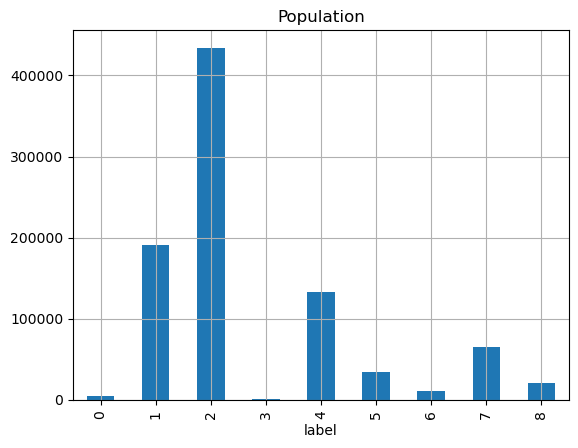

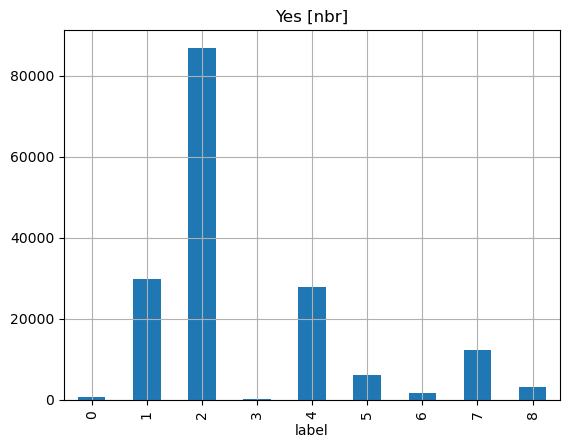

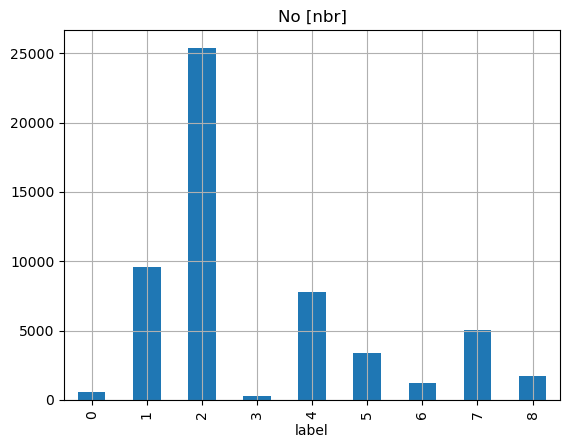

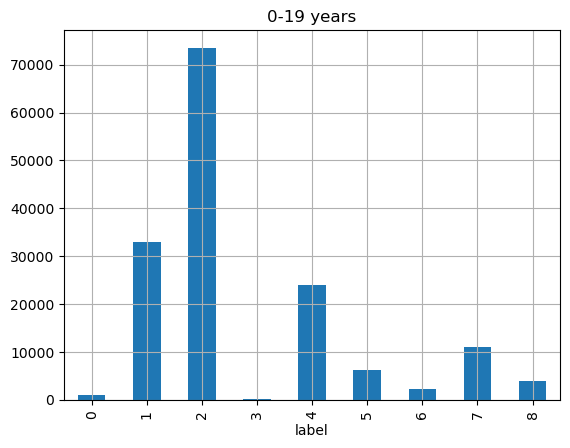

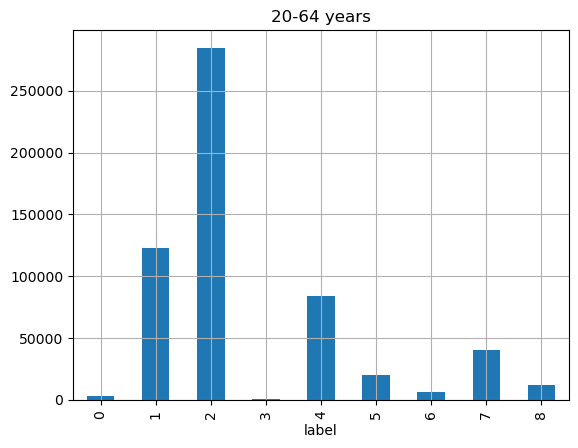

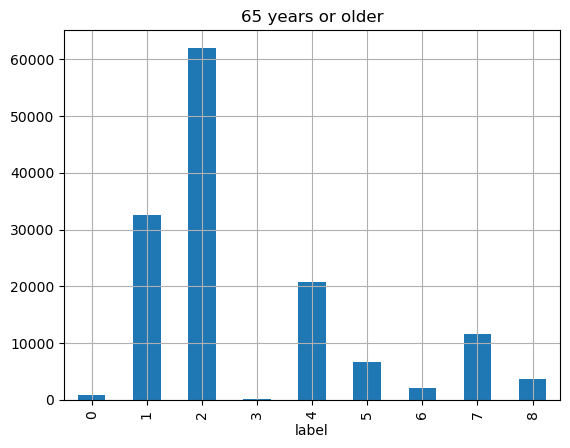

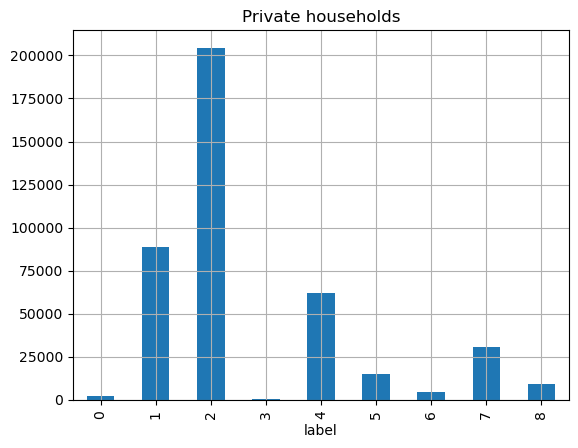

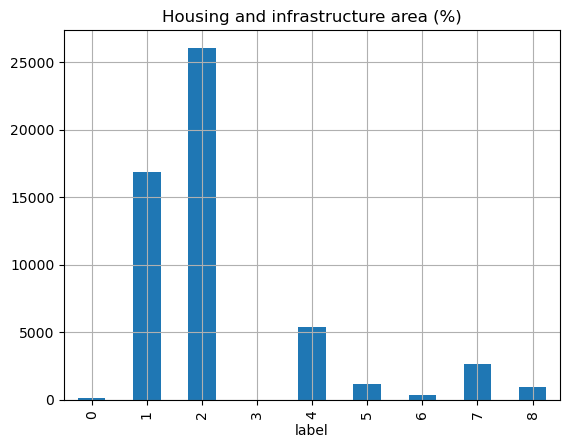

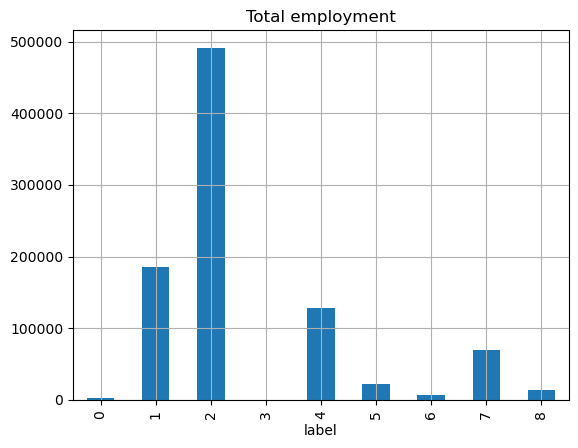

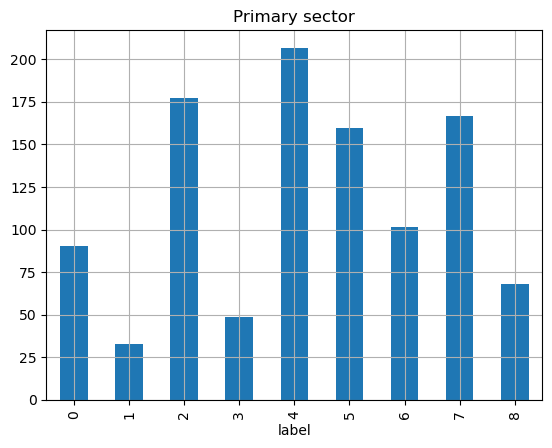

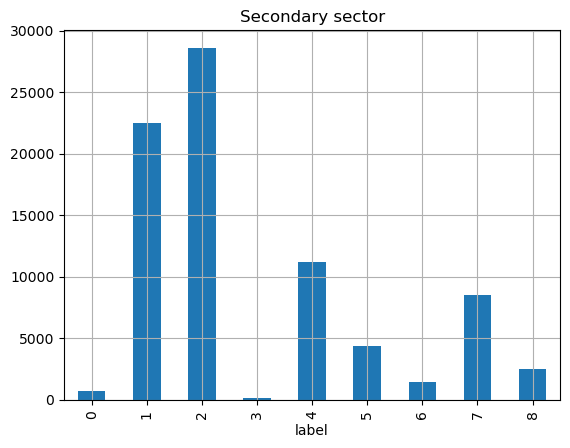

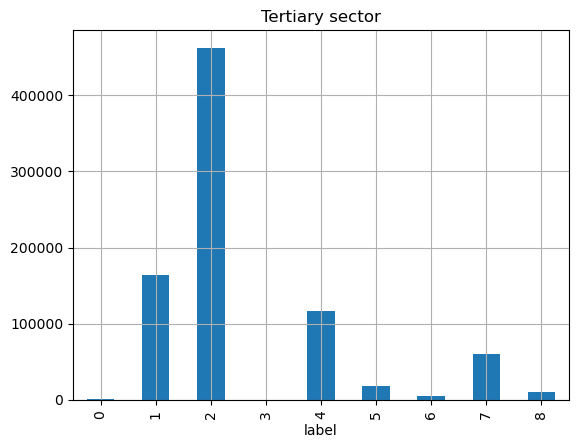

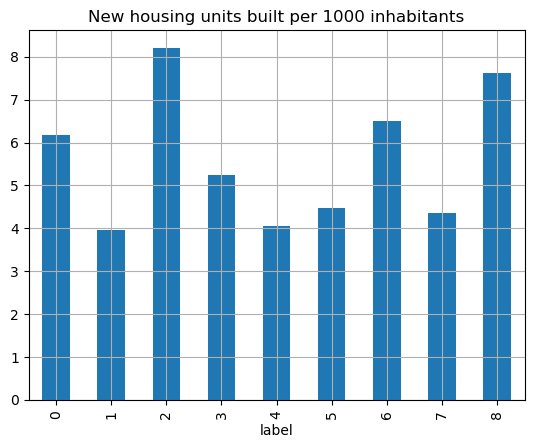

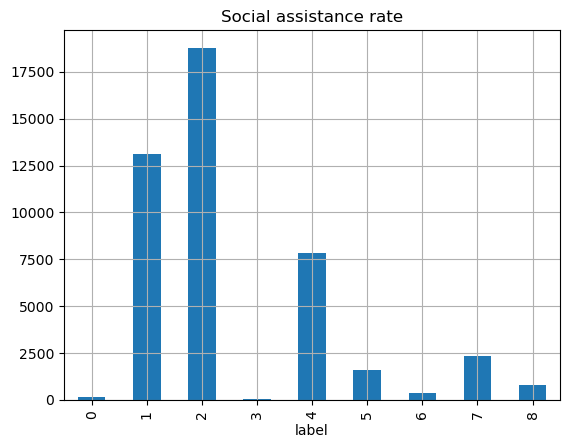

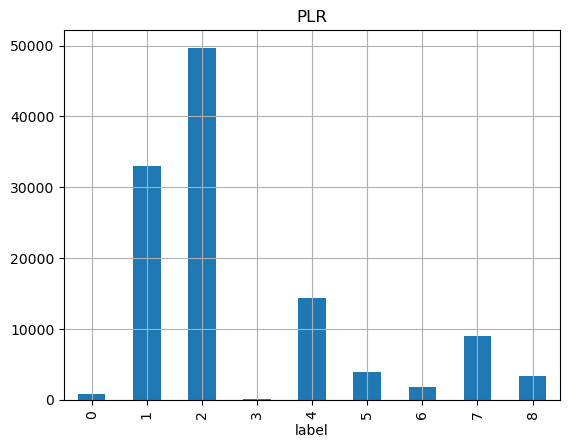

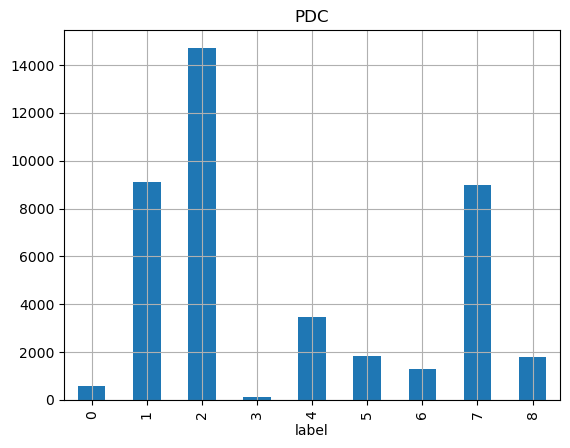

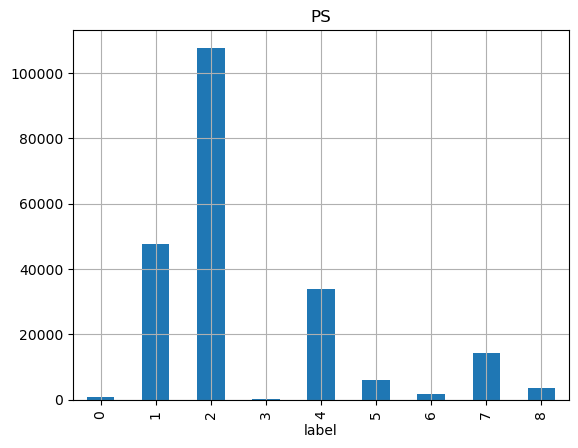

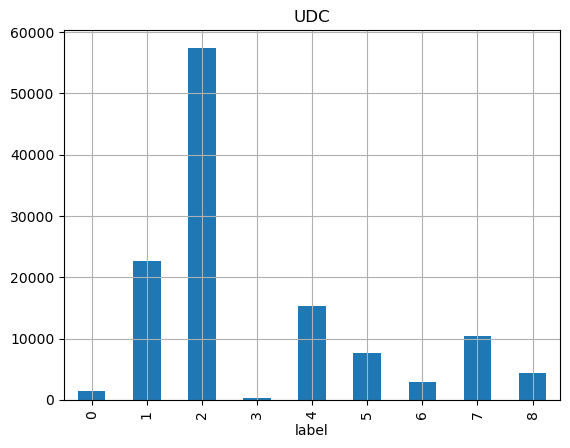

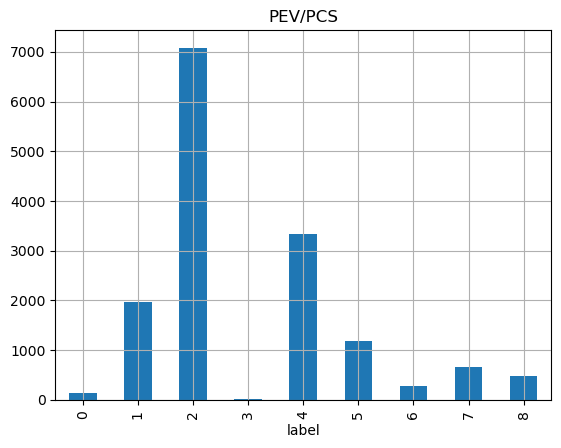

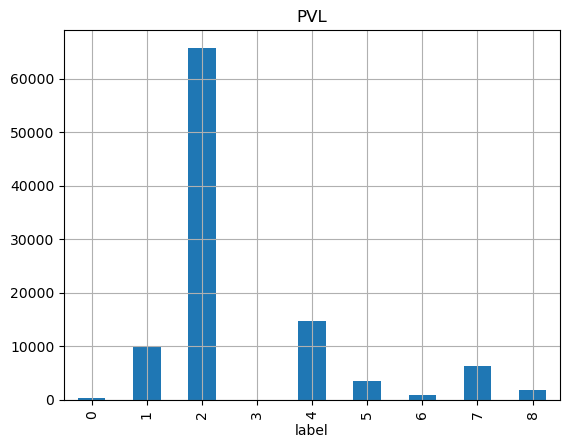

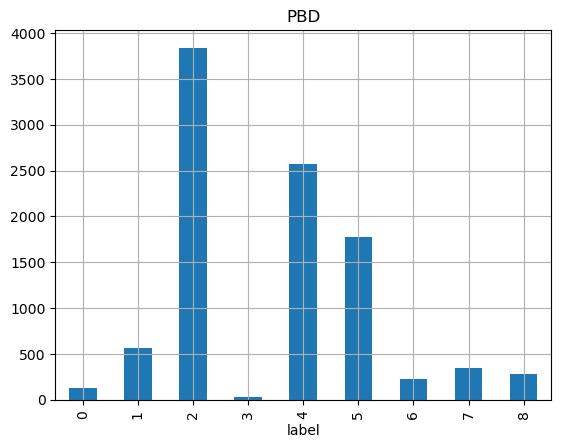

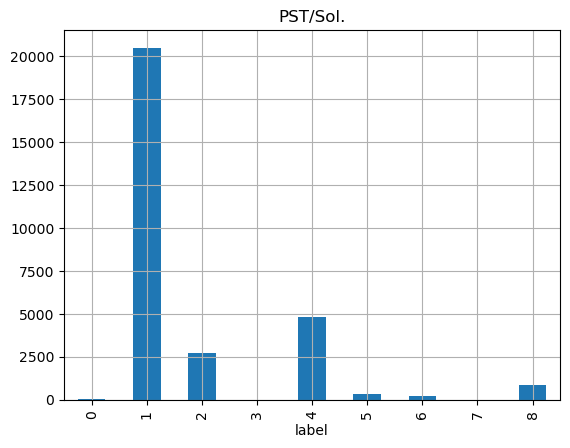

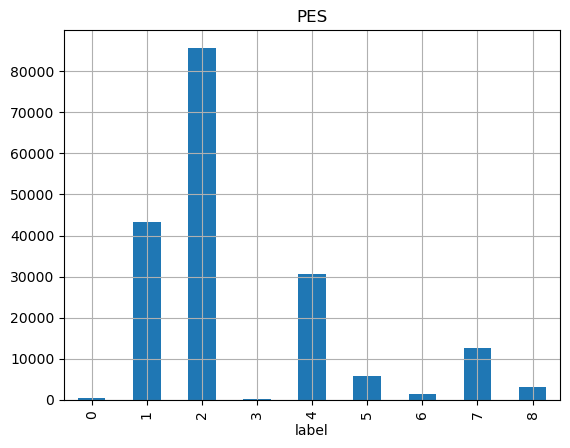

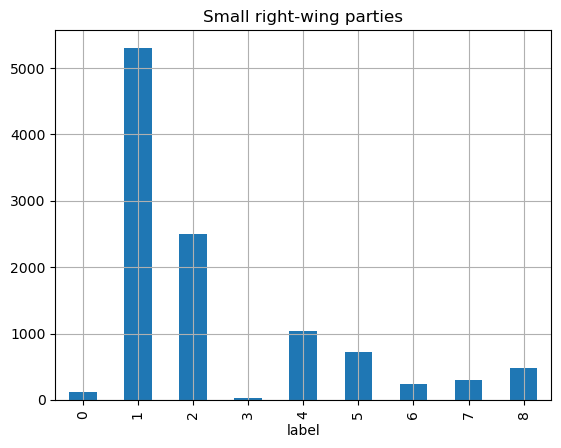

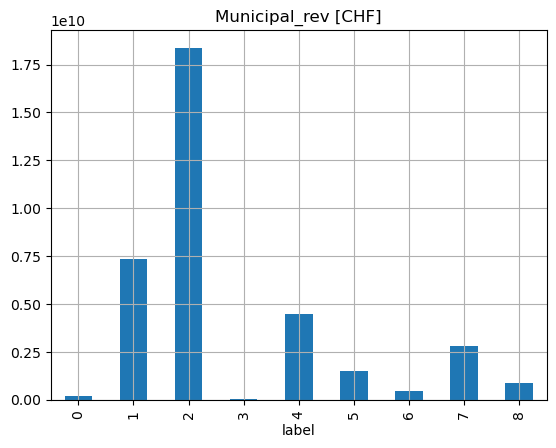

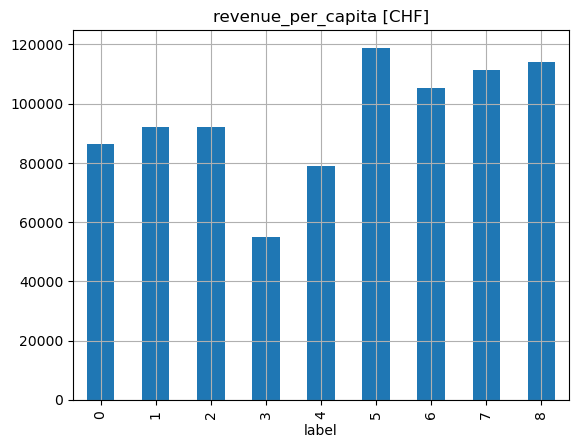

In [144]:
for col in group.columns:
    group[col].plot(kind="bar")
    plt.title(col)
    plt.grid()
    plt.show()

In [146]:
group.describe()

Population     Yes [nbr]      No [nbr]    0-19 years    20-64 years  \
count       9.000000      9.000000      9.000000      9.000000       9.000000   
mean    99584.103617  18725.346591   6106.953049  17238.650562   63905.514549   
std    141230.007212  27938.392554   7934.400749  23904.014518   92734.950448   
min       991.712427    262.876712    244.322244    200.443722     578.874431   
25%     11294.173913   1752.086957   1205.104348   2202.252174    6604.252174   
50%     33746.428571   6022.142857   3357.857143   6325.000000   20227.285714   
75%    133487.666667  27808.000000   7798.666667  24039.666667   84343.000000   
max    433989.000000  86847.000000  25386.000000  73514.000000  284691.000000   

       65 years or older  Private households  \
count           9.000000            9.000000   
mean        15615.054144        46408.869574   
std         20439.406750        66572.024896   
min           181.051399          406.969421   
25%          2109.034783         4771.791304   
50%          6586.571429        15175.857143   
75%         20674.666667        61979.666667   
max         62012.000000       204411.000000   

       Housing and infrastructure area (%)  Total employment  Primary sector  \
count                             9.000000          9.000000        9.000000   
mean                           5946.378010     102183.929296      116.705205   
std                            9241.179430     159652.943983       62.412655   
min                              11.760531        385.071184       32.500000   
25%                             391.660161       6433.729730       67.765957   
50%                            1154.043171      22398.714286      101.225225   
75%                            5364.199973     128554.666667      166.666667   
max                           26041.886202     491193.000000      206.666667   

       ...             PS           UDC      PEV/PCS           PVL  \
count  ...       9.000000      9.000000     9.000000      9.000000   
mean   ...   24010.104957  13613.652214  1683.708054  11487.175377   
std    ...   35513.326690  17944.766417  2285.232607  20953.154162   
min    ...     123.761808    323.236739    25.692414     58.688374   
25%    ...    1858.831425   2883.451598   283.736872    918.365370   
50%    ...    6190.500174   7677.949473   664.259526   3591.453681   
75%    ...   33804.703004  15286.639061  1959.580187   9929.547861   
max    ...  107698.694260  57449.976010  7079.531319  65805.618895   

               PBD      PST/Sol.           PES  Small right-wing parties  \
count     9.000000      8.000000      9.000000                  9.000000   
mean   1086.216244   3687.629811  20356.703717               1190.757605   
std    1346.209204   6993.796085  28792.993569               1717.392194   
min      34.898289     10.324860     98.277932                 29.591817   
25%     228.153332    187.143651   1480.699027                237.974806   
50%     344.149382    580.003744   5748.495335                477.849209   
75%    1779.453825   3251.067376  30700.953975               1030.563172   
max    3839.668224  20483.852512  85680.157477               5305.950615   

       Municipal_rev [CHF]  revenue_per_capita [CHF]  
count         9.000000e+00                  9.000000  
mean          4.009311e+09              94896.091303  
std           5.901483e+09              20178.118900  
min           3.394784e+07              54918.692139  
25%           4.508629e+08              86317.151610  
50%           1.489755e+09              92219.973846  
75%           4.502059e+09             111304.257599  
max           1.837301e+10             118865.258449  

[8 rows x 26 columns]

In [148]:
group_percentage = group
for col in group.columns:
    group_percentage[col] = group[col]/group[col].sum()
group_percentage

Population  Yes [nbr]  No [nbr]  0-19 years  20-64 years  \
label                                                             
0        0.005644   0.004181  0.010886    0.006489     0.005110   
1        0.213646   0.176564  0.174965    0.211949     0.214000   
2        0.484224   0.515326  0.461878    0.473832     0.494986   
3        0.001107   0.001560  0.004445    0.001292     0.001006   
4        0.148939   0.165005  0.141890    0.154947     0.146645   
5        0.037653   0.035734  0.061094    0.040768     0.035169   
6        0.012601   0.010396  0.021926    0.014195     0.011483   
7        0.072800   0.072473  0.091850    0.070668     0.070141   
8        0.023386   0.018761  0.031066    0.025861     0.021459   

       65 years or older  Private households  \
label                                          
0               0.006509            0.005017   
1               0.232155            0.213063   
2               0.441255            0.489396   
3               0.001288            0.000974   
4               0.147113            0.148390   
5               0.046868            0.036334   
6               0.015007            0.011425   
7               0.083130            0.074052   
8               0.026675            0.021349   

       Housing and infrastructure area (%)  Total employment  Primary sector  \
label                                                                          
0                                 0.002117          0.002426        0.085780   
1                                 0.315589          0.202278        0.030942   
2                                 0.486606          0.534106        0.168516   
3                                 0.000220          0.000419        0.046239   
4                                 0.100233          0.139786        0.196760   
5                                 0.021564          0.024356        0.152195   
6                                 0.007318          0.006996        0.096373   
7                                 0.048904          0.074972        0.158678   
8                                 0.017449          0.014662        0.064518   

       ...        PS       UDC   PEV/PCS       PVL       PBD  PST/Sol.  \
label  ...                                                               
0      ...  0.003467  0.011593  0.008594  0.003587  0.013658  0.002251   
1      ...  0.220731  0.184778  0.129316  0.096045  0.057356  0.694343   
2      ...  0.498395  0.468892  0.467192  0.636513  0.392767  0.092390   
3      ...  0.000573  0.002638  0.001695  0.000568  0.003570  0.000350   
4      ...  0.156437  0.124766  0.220416  0.141755  0.263275  0.163637   
5      ...  0.028648  0.062665  0.078080  0.034739  0.182024  0.010995   
6      ...  0.008602  0.023534  0.018724  0.008883  0.023338  0.007708   
7      ...  0.066345  0.084949  0.043836  0.060366  0.035204       NaN   
8      ...  0.016802  0.036185  0.032146  0.017545  0.028809  0.028326   

            PES  Small right-wing parties  Municipal_rev [CHF]  \
label                                                            
0      0.002980                  0.011484             0.004953   
1      0.236429                  0.495105             0.204272   
2      0.467660                  0.232945             0.509176   
3      0.000536                  0.002761             0.000941   
4      0.167572                  0.096163             0.124767   
5      0.031376                  0.067473             0.041286   
6      0.008082                  0.022206             0.012495   
7      0.068302                  0.027273             0.077934   
8      0.017061                  0.044589             0.024177   

       revenue_per_capita [CHF]  
label                            
0                      0.101066  
1                      0.107978  
2                      0.107869  
3                      0.064303  
4                      0.092476  
5                      0.139176  
6                      0.123350  
7          

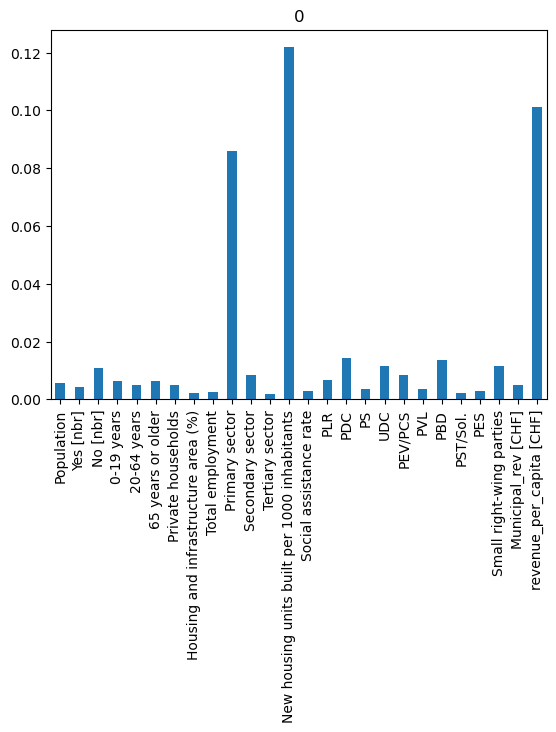

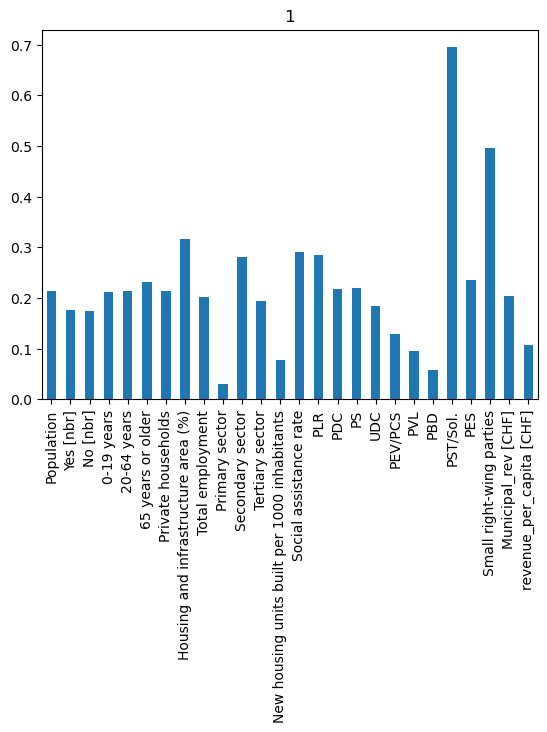

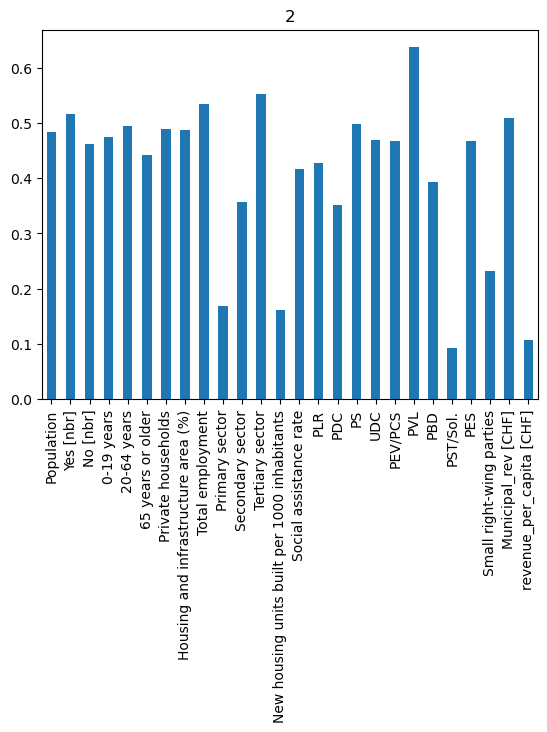

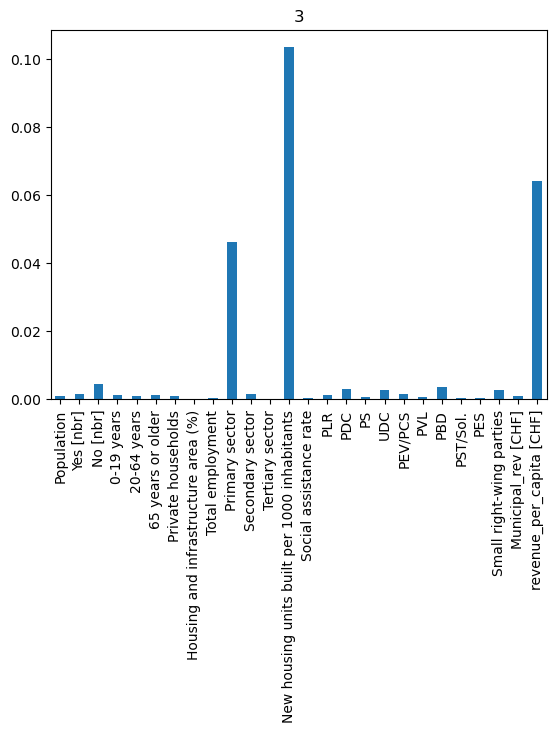

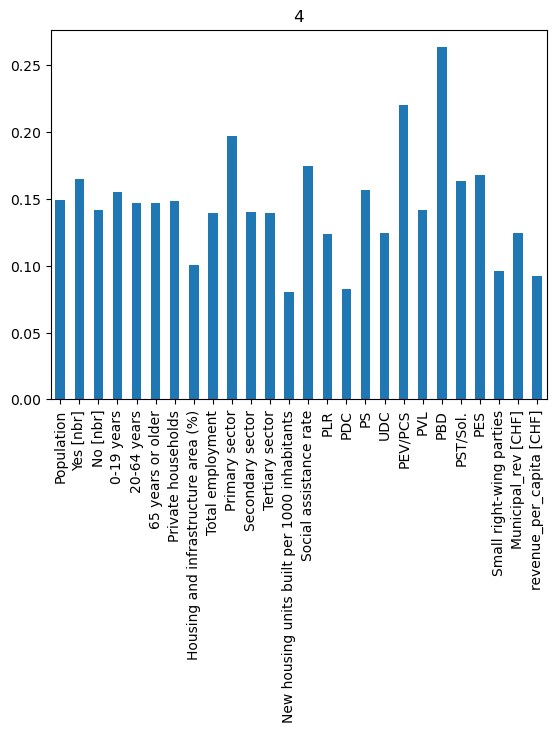

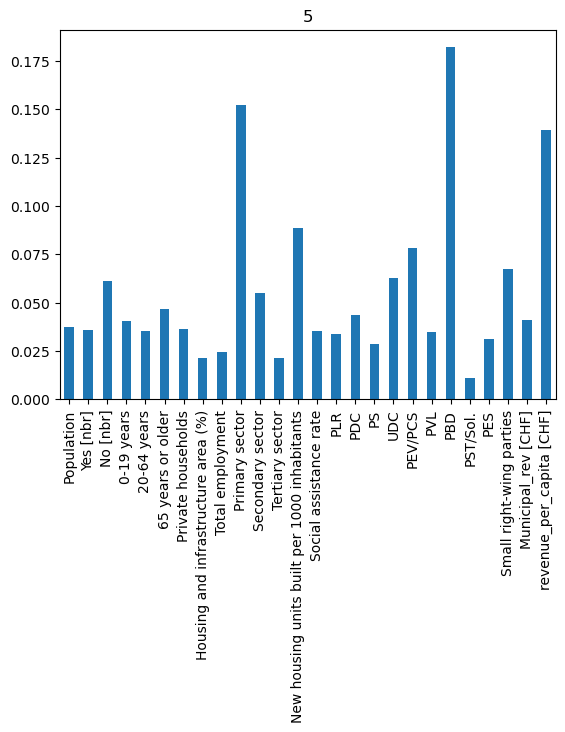

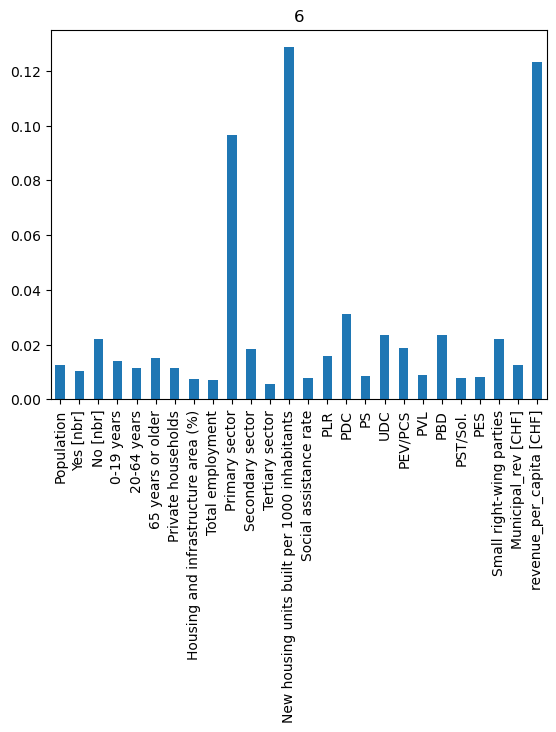

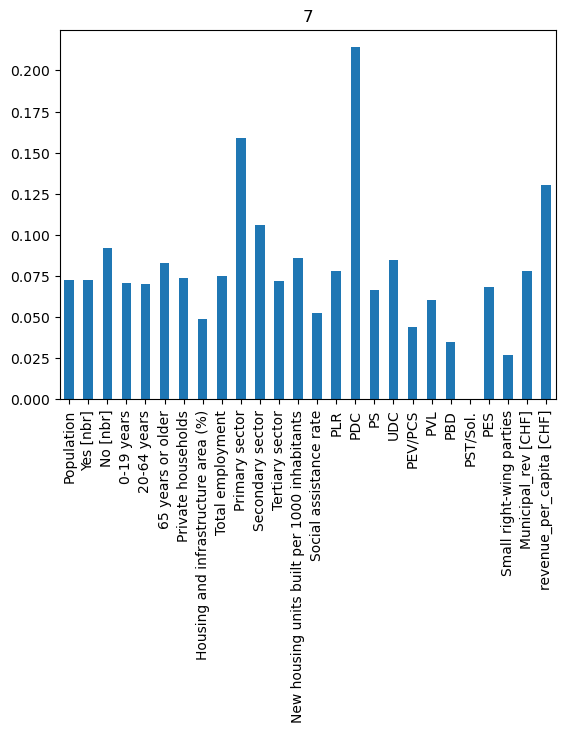

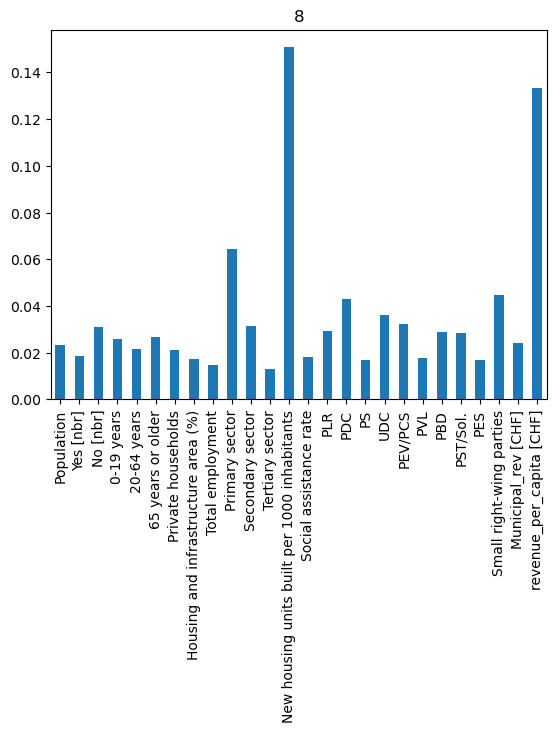

In [150]:
for index, row in group.iterrows():
    row.plot(kind="bar")
    plt.title(index)
    plt.show()

# Tree based separation 

Distance matrix variance: 0.0
                    Cluster
MunicipalityNumber         
2.0                       0
3.0                       0
4.0                       0
5.0                       0
7.0                       0


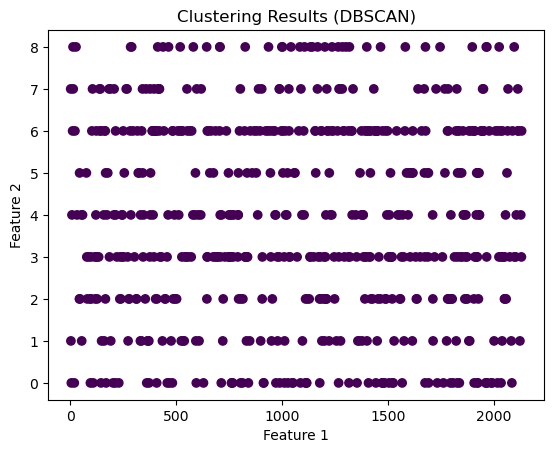

In [178]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming `df` is your initial DataFrame with both numeric and non-numeric columns
# Convert non-numeric columns to numeric using Label Encoding
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Drop any rows with NaN values if any
df = df.dropna()

# Set a dummy target for Random Forest training (since clustering does not require a true target)
dummy_target = np.zeros(len(df))

# Convert `df` to a numpy array before passing it into the classifier
X = df.to_numpy()

# Initialize and train the Random Forest Classifier
n_trees = 100
rf = RandomForestClassifier(n_estimators=n_trees, max_depth=10, random_state=42)  # Increased depth
rf.fit(X, dummy_target)

# Get the leaf node indices for each sample in each tree
leaf_node_ids = np.array([tree.apply(X) for tree in rf.estimators_]).T

# Calculate the proximity matrix
proximity_matrix = np.zeros((len(df), len(df)))
for i in range(n_trees):
    same_leaf = np.equal.outer(leaf_node_ids[:, i], leaf_node_ids[:, i])
    proximity_matrix += same_leaf

# Normalize the proximity matrix
proximity_matrix /= n_trees
distance_matrix = 1 - proximity_matrix  # Distance = 1 - proximity

# Check the distance matrix variance
print("Distance matrix variance:", np.var(distance_matrix))

# Apply DBSCAN clustering on the distance matrix
dbscan = DBSCAN(metric='precomputed')
clusters = dbscan.fit_predict(distance_matrix)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Display the DataFrame with clusters
print(df[['Cluster']].head())

# Visualize the clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Clustering Results (DBSCAN)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [180]:
group = df.groupby("Cluster")[df.columns].mean()
group

MunicipalityName  urban_typo  mountain_type  mountain_binary  \
Cluster                                                                 
0             1069.949324     3.83277       2.190878         0.660473   

          Population  language     Canton    Yes [nbr]    No [nbr]  \
Cluster                                                              
0        5438.376689  0.690878  14.787162  1245.126689  722.353041   

          0-19 years  ...     PEV/PCS         PVL         PBD    PST/Sol.  \
Cluster               ...                                                   
0        1056.032095  ...  137.854649  574.418772  123.255629  127.023377   

                PES  Small right-wing parties  Municipal_rev [CHF]  \
Cluster                                                              
0        911.089326                116.811464         2.148706e+08   

         revenue_per_capita [CHF]     label  Cluster  
Cluster                                               
0                    57230.460867  2.804054      0.0  

[1 rows x 34 columns]